# Código para Unir los datasets

## Instalar Librerías

In [ ]:
#instala pandas
%pip install pandas

## Primer modelo
Cantidad de datos: 166475

# TRATAMIENTO DE DATOS

### DATASET: EXPERIENCIAS LABORALES

- **ID_POSTULANTE**: Código o llave para relacionarlo con el archivo de `DATA_POSTULANTE`. ID del postulante anonimizado.

- **EMPRESA**: Nombre de la empresa donde laboró el postulante. Anonimizado.

- **FECHAINICIO_EXP**: Fecha de inicio de la relación laboral.

- **FECHAFIN_EXP**: Fecha de finalización de la relación laboral.

- **DESCRIPCION**: Descripción detallada de la experiencia laboral del postulante.

- **RANGO_SALARIAL**: Rango salarial durante el periodo laboral en la empresa.

In [27]:
import re

df = pd.read_csv('DATA_EXPERIENCIASLABORALES.csv', sep=',')

#Pasar a formato fecha FECHAINICIO y FECHAFIN en el formato YYYYMMDD
df['FECHAINICIO'] = pd.to_datetime(df['FECHAINICIO'], format='%Y%m%d', errors='coerce')
df['FECHAFIN'] = pd.to_datetime(df['FECHAFIN'], format='%Y%m%d', errors='coerce')

#Llenar valores nulos en FECHAFIN y FECHAINICIO
df['FECHAINICIO'] = df['FECHAINICIO'].fillna('No especificado')
df['FECHAFIN'] = df['FECHAFIN'].fillna('No especificado')

#Cambiar el nombre de las columnas FECHAINICIO y FECHAFIN, por FECHAINICIO_EXP y FECHAFIN_EXP
df = df.rename(columns={'FECHAINICIO': 'FECHAINICIO_EXP', 'FECHAFIN': 'FECHAFIN_EXP'})

# Función de limpieza para aplicar a cada texto en la columna DESCRIPCION
def limpiar_descripcion(texto):
    # 1. Normalizar caracteres especiales comunes
    replacements = {
        'Ã¡': 'á', 'Ã©': 'é', 'Ã­': 'í', 'Ã³': 'ó', 'Ãº': 'ú',
        'Ã‘': 'Ñ', 'Ã±': 'ñ', 'Ã¼': 'ü', 'Â¿': '¿', 'Â¡': '¡',
        'Â': '', 'Ä': 'A', 'Å': 'A', 'Æ': 'E', 'Ç': 'C', 'Ã':'o',
        # Añade otros caracteres especiales según sea necesario
    }
    
    for key, value in replacements.items():
        texto = texto.replace(key, value)

    # 2. Remover todas las comillas dobles, comillas simples y comas
    texto = re.sub(r'[“”"‘’\',]', '', texto)
    
    # 3. Eliminar saltos de línea, tabulaciones y caracteres extraños
    texto = re.sub(r'[\r\n\t]+', ' ', texto)
    
    # 4. Quitar emojis y caracteres no deseados específicos
    texto = re.sub(r'[^\w\s.%€$]', '', texto)

    # Borra especificamente este caracter â€
    texto = texto.replace('â€', '')
    
    # 5. Remover guiones y espacios redundantes
    texto = re.sub(r'[-]+', ' ', texto)
    
    # 6. Convertir a texto plano y quitar espacios extra
    texto = re.sub(r'\s+', ' ', texto).strip()
    
    # 7. Normalizar acentos y caracteres especiales manualmente
    replacements = {
        'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u',
        'Á': 'A', 'É': 'E', 'Í': 'I', 'Ó': 'O', 'Ú': 'U',
        'ñ': 'n', 'Ñ': 'N', '¿': '', '¡': '', 'ü': 'u', 'ç': 'c', 'Ãœ': 'u'
    }
    for key, value in replacements.items():
        texto = texto.replace(key, value)

    return texto

# Aplicar la función de limpieza a la columna DESCRIPCION
df['DESCRIPCION'] = df['DESCRIPCION'].apply(limpiar_descripcion)

# Llenar valores nulos en DESCRIPCION
df['DESCRIPCION'] = df['DESCRIPCION'].str.replace('nan', 'No especificado')
df['DESCRIPCION'] = df['DESCRIPCION'].fillna('No especificado')

# Rellenar valores nulos en EMPRESA
df['EMPRESA'] = df['EMPRESA'].fillna('No especificado') 

#Tratar columna RANGO_SALARIAL
df['RANGO_SALARIAL'] = df['RANGO_SALARIAL'].str.replace('Hasta-', '0 - ')
df['RANGO_SALARIAL'] = df['RANGO_SALARIAL'].str.replace('Hasta - ', '0 - ')
df['RANGO_SALARIAL'] = df['RANGO_SALARIAL'].str.replace('Hasta ', '0 - ')
#tratar para casos como >=10000 y similares
df['RANGO_SALARIAL'] = df['RANGO_SALARIAL'].str.replace('>=', '0 - ')
df['RANGO_SALARIAL'] = df['RANGO_SALARIAL'].str.replace('>', '')
df['RANGO_SALARIAL'] = df['RANGO_SALARIAL'].str.replace('=', '')
df['RANGO_SALARIAL'] = df['RANGO_SALARIAL'].str.replace(' ', '')
df['RANGO_SALARIAL'] = df['RANGO_SALARIAL'].str.replace('A', '-')
df['RANGO_SALARIAL'] = df['RANGO_SALARIAL'].str.replace('a', '-')
df['RANGO_SALARIAL'] = df['RANGO_SALARIAL'].str.replace('AL', '-')
df['RANGO_SALARIAL'] = df['RANGO_SALARIAL'].str.replace('al', '-')
df['RANGO_SALARIAL'] = df['RANGO_SALARIAL'].str.replace('DE', '-')
df['RANGO_SALARIAL'] = df['RANGO_SALARIAL'].str.replace('de', '-')
df['RANGO_SALARIAL'] = df['RANGO_SALARIAL'].str.replace('Y', '-')
df['RANGO_SALARIAL'] = df['RANGO_SALARIAL'].str.replace('y', '-')
df['RANGO_SALARIAL'] = df['RANGO_SALARIAL'].str.replace('HASTA', '-')
df['RANGO_SALARIAL'] = df['RANGO_SALARIAL'].str.replace('hasta', '-')
#Llenar valores nulos en RANGO_SALARIAL
df['RANGO_SALARIAL'] = df['RANGO_SALARIAL'].fillna('No especificado')
#Divide esta columna en dos columnas SALARIO_MIN y SALARIO_MAX, si existe un solo valor se duplica
df[['SALARIO_MIN', 'SALARIO_MAX']] = df['RANGO_SALARIAL'].str.split('-', expand=True)
#Convierte los valores a numéricos
df['SALARIO_MIN'] = pd.to_numeric(df['SALARIO_MIN'], errors='coerce')
df['SALARIO_MAX'] = pd.to_numeric(df['SALARIO_MAX'], errors='coerce')
#Rellenar valores nulos
df['SALARIO_MIN'] = df['SALARIO_MIN'].fillna(0)
df['SALARIO_MAX'] = df['SALARIO_MAX'].fillna(0)

#imprimir todos los nulos o NaN o estén vacios por columna de data_experoenciaslaborales
print("\nNulos en DATA_EXPERIENCIASLABORALES:")
print(df.isnull().sum())

#Guardar el archivo limpio
df.to_csv('EXPERIENCIASLABORALES_NOT_NULL.csv', index=False, encoding='utf-8')
print("\nArchivo guardado exitosamente como 'EXPERIENCIASLABORALES_NOT_NULL.csv'")

df.head()


Nulos en DATA_EXPERIENCIASLABORALES:
ID_POSTULANTE      0
EMPRESA            0
FECHAINICIO_EXP    0
FECHAFIN_EXP       0
DESCRIPCION        0
RANGO_SALARIAL     0
SALARIO_MIN        0
SALARIO_MAX        0
dtype: int64

Archivo guardado exitosamente como 'EXPERIENCIASLABORALES_NOT_NULL.csv'


,ID_POSTULANTE,EMPRESA,FECHAINICIO_EXP,FECHAFIN_EXP,DESCRIPCION,RANGO_SALARIAL,SALARIO_MIN,SALARIO_MAX
0,03AFDBD66E7929B125F8597834FA83A4,AAB3DD1AA8AF62CB516EE8C9AEEB0B35,2020-03-01 00:00:00,2021-07-01 00:00:00,capacitar a miembros de mesa fuerzas armadas y...,2500-2999,2500.0,2999.0
1,03AFDBD66E7929B125F8597834FA83A4,AAB3DD1AA8AF62CB516EE8C9AEEB0B35,2020-03-01 00:00:00,2021-07-01 00:00:00,capacitar a miembros de mesa fuerzas armadas y...,2500-2999,2500.0,2999.0
2,EA5D2F1C4608232E07D3AA3D998E5135,89C9A87CE323B6A3086D15356D3DB2BA,2019-06-01 00:00:00,2020-09-01 00:00:00,Valorizacion de los trabajos realizados mensua...,1600-1799,1600.0,1799.0
3,EA5D2F1C4608232E07D3AA3D998E5135,89C9A87CE323B6A3086D15356D3DB2BA,2019-06-01 00:00:00,2020-09-01 00:00:00,Valorizacion de los trabajos realizados mensua...,1600-1799,1600.0,1799.0
4,FC490CA45C00B1249BBE3554A4FDF6FB,8EAC8447385B013E2A83BAAAB6B47F35,2003-10-01 00:00:00,2021-01-01 00:00:00,jefe de division jefe de ventas jefe de almacen,2500-2999,2500.0,2999.0


### DATASET: POSTULANTE

- **ID_POSTULANTE**: Código o llave para relacionarlo con el archivo de `DATA_EDUCACION` y `DATA_EXPERIENCIASLABORALES`. ID del postulante anonimizado.

- **EDAD**: Edad del postulante.

- **SEXO**: Sexo del postulante.  
  - `F` = Femenino  
  - `M` = Masculino

- **DEPARTAMENTO**: Departamento donde vive el postulante.

- **PROVINCIA**: Provincia donde vive el postulante.

- **DISTRITO**: Distrito donde vive el postulante.

- **UBIGEO**: Código de ubicación geográfica donde vive el postulante.

- **ESTADO_CONADIS**: Inscrito en CONADIS.  
  - `1` = Sí, está inscrito  
  - `0` = No está inscrito

- **DOC_ID**: Código o llave para relacionarlo con el archivo de `DATA_DISCAPACIDAD`.

In [7]:
import pandas as pd
import numpy as np

# Enlaces de tus archivos
url_postulante = 'https://drive.google.com/file/d/1SafIdXKzpLRDJrCQuMAyJh-vE84Zv-P8/view?usp=drive_link'

# Función para convertir el enlace de Google Drive en enlace directo
def get_drive_link(url):
    file_id = url.split('/')[-2]
    return f'https://drive.google.com/uc?id={file_id}'

# 1. Leer los archivos
df_postulante = pd.read_csv(get_drive_link(url_postulante))
print("Archivo de postulante leído correctamente")

#Tratamiento profundo de datos
categorical_columns = ['DEPARTAMENTO', 'PROVINCIA', 'DISTRITO']
for col in categorical_columns:
    df_postulante[col] = df_postulante[col].fillna('No especificado')

# Columna Estado_coanadis es de tipo categorico numerico, llena los valores nulos
df_postulante['ESTADO_CONADIS'] = df_postulante['ESTADO_CONADIS'].fillna(0)

#Rellenar valores nulos específicos para otras columnas
df_postulante['UBIGEO'] = df_postulante['UBIGEO'].fillna('No especificado')

#Imprimir
df_postulante.head()

#Guardar en un nuevo archivo
df_postulante.to_csv('POSTULANTE_NOT_NULL.csv', index=False, encoding='utf-8')
print("\nArchivo guardado exitosamente como 'POSTULANTE_NOT_NULL.csv'")



Archivo de postulante leído correctamente

Archivo guardado exitosamente como 'POSTULANTE_NOT_NULL.csv'


### DATASET: DISCAPACIDAD

- **DOC_ID**: ID del postulante, llave foránea para unir este dataset con el dataset de `POSTULANTES`.

- **CAUSA**: Causa de la discapacidad del postulante.

- **DSCORE**: Nivel de dificultad asociado a la discapacidad.  
  - `1` = Sin dificultad  
  - `2` = Dificultad leve o moderada  
  - `3` = Dificultad severa

In [32]:
url_discapacidad = 'https://drive.google.com/file/d/1k5tO-1iZ5FGWMJuykYylvbyafiXIMnZ-/view?usp=drive_link'

# Función para convertir el enlace de Google Drive en enlace directo
def get_drive_link(url):
    file_id = url.split('/')[-2]
    return f'https://drive.google.com/uc?id={file_id}'

# Leer discapacidad
df_discapacidad = pd.read_csv(get_drive_link(url_discapacidad))
print("Archivo de discapacidad leído correctamente")

#Cantidad de nulos por columna
print("\nNulos en DISCAPACIDAD:")
print(df_discapacidad.isnull().sum())

#Imprime todos los valores de la columna CAUSA
print("\nValores únicos en CAUSA:")
print(df_discapacidad['CAUSA'].unique())

#Imprimir valores unicos de la columna DSCORE
print("\nValores únicos en DSCORE:")
print(df_discapacidad['DSCORE'].unique())

#Cambiar nombre de la columna DBIDPOSTULANTE por DOC_ID
df_discapacidad = df_discapacidad.rename(columns={'DBIDPOSTULANTE': 'DOC_ID'})

#Guardar en un nuevo archivo
df_discapacidad.to_csv('DISCAPACIDAD_NOT_NULL.csv', index=False, encoding='utf-8')
print("\nArchivo guardado exitosamente como 'DISCAPACIDAD_NOT_NULL.csv'")

df_discapacidad.head()

Archivo de discapacidad leído correctamente

Nulos en DISCAPACIDAD:
DBIDPOSTULANTE    0
CAUSA             0
DSCORE            0
dtype: int64

Valores únicos en CAUSA:
['Congénita' 'Adquirida - Edad adulta' 'Adquirida - Niñez'
 'Adquirida - Infancia' 'Adquirida - Juventud']

Valores únicos en DSCORE:
[1 2 3]

Archivo guardado exitosamente como 'DISCAPACIDAD_NOT_NULL.csv'


,DOC_ID,CAUSA,DSCORE
0,000b6cfd5fd843ac94feaf832cf51149,Congénita,1
1,000b6cfd5fd843ac94feaf832cf51149,Congénita,1
2,000b6cfd5fd843ac94feaf832cf51149,Congénita,1
3,000b6cfd5fd843ac94feaf832cf51149,Congénita,1
4,000b6cfd5fd843ac94feaf832cf51149,Congénita,1


### DATASET: EDUCACION

- **ID_POSTULANTE**: Código o llave para relacionarlo con el archivo de `DATA_POSTULANTE`.

- **INSTITUCION**: Institución donde el postulante realizó sus estudios.

- **GRADO**: Grado académico obtenido por el postulante.

- **FECHAINICIO_EDU**: Fecha de inicio de los estudios.

- **FECHAFIN_EDU**: Fecha de finalización de los estudios.

- **CARRERA**: Carrera o especialidad estudiada por el postulante.

In [3]:
import re
import pandas as pd 

# Enlaces de tus archivos
url_educacion = 'https://drive.google.com/file/d/1RBDPcDPG2mCV6dQbUlEJYy8KpnuDPAJH/view?usp=drive_link'

# Función para convertir el enlace de Google Drive en enlace directo
def get_drive_link(url):
    file_id = url.split('/')[-2]
    return f'https://drive.google.com/uc?id={file_id}'

# Leer educación
df_educacion = pd.read_csv(get_drive_link(url_educacion),
                            sep=';',
                            quotechar='"',
                            encoding='utf-8',
                            engine='c',
                            on_bad_lines='skip')
print("Archivo de educación leído correctamente")

#Convertir columna INSTITUCION, CARRERA y GRADO a String
df_educacion['INSTITUCION'] = df_educacion['INSTITUCION'].astype(str)
df_educacion['CARRERA'] = df_educacion['CARRERA'].astype(str)
df_educacion['GRADO'] = df_educacion['GRADO'].astype(str)

# Función de limpieza para aplicar a cada texto en la columna DESCRIPCION
def limpiar_carrera(texto):
    
    # 1. Normalizar caracteres especiales comunes
    replacements = {
        'Ã¡': 'á', 'Ã©': 'é', 'Ã­': 'í', 'Ã³': 'ó', 'Ãº': 'ú',
        'Ã‘': 'Ñ', 'Ã±': 'ñ', 'Ã¼': 'ü', 'Â¿': '¿', 'Â¡': '¡',
        'Â': '', 'Ä': 'A', 'Å': 'A', 'Æ': 'E', 'Ç': 'C', 'Ã':'o',
        # Añade otros caracteres especiales según sea necesario
    }
    
    for key, value in replacements.items():
        texto = texto.replace(key, value)

    # 2. Remover todas las comillas dobles, comillas simples y comas
    texto = re.sub(r'[“”"‘’\',]', '', texto)
    
    # 3. Eliminar saltos de línea, tabulaciones y caracteres extraños
    texto = re.sub(r'[\r\n\t]+', ' ', texto)
    
    # 4. Quitar emojis y caracteres no deseados específicos
    texto = re.sub(r'[^\w\s.%€$]', '', texto)

    # Borra especificamente este caracter â€
    texto = texto.replace('â€', '')
    
    # 5. Remover guiones y espacios redundantes
    texto = re.sub(r'[-]+', ' ', texto)
    
    # 6. Convertir a texto plano y quitar espacios extra
    texto = re.sub(r'\s+', ' ', texto).strip()
    
    # 7. Normalizar acentos y caracteres especiales manualmente
    replacements = {
        'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u',
        'Á': 'A', 'É': 'E', 'Í': 'I', 'Ó': 'O', 'Ú': 'U',
        'ñ': 'n', 'Ñ': 'N', '¿': '', '¡': '', 'ü': 'u', 'ç': 'c', 'Ãœ': 'u'
        }
    
    # 8. Convertir todo a minúsculas
    texto = texto.lower()

    for key, value in replacements.items():
        texto = texto.replace(key, value)

    return texto

# Aplicar la función de limpieza a la columna INSTITUCION
df_educacion['INSTITUCION'] = df_educacion['INSTITUCION'].apply(limpiar_carrera)

# Aplicar la función de limpieza a la columna CARRERA
df_educacion['CARRERA'] = df_educacion['CARRERA'].apply(limpiar_carrera)

# Aplicar la función de limpieza a la columna GRADO
df_educacion['GRADO'] = df_educacion['GRADO'].apply(limpiar_carrera)

#Tratamiento de Nulos
categorical_columns = ['GRADO', 'CARRERA', 'INSTITUCION']
for col in categorical_columns:
    df_educacion[col] = df_educacion[col].fillna('No especificado')

#Convertir a fecha las columnas FECHAINICIO y FECHAFIN, el formato es YYYYMMDD
df_educacion['FECHAINICIO'] = pd.to_datetime(df_educacion['FECHAINICIO'], format='%Y%m%d', errors='coerce')
df_educacion['FECHAFIN'] = pd.to_datetime(df_educacion['FECHAFIN'], format='%Y%m%d', errors='coerce')

#Llenar valores nulos en FECHAFIN y FECHAINICIO con valores datetime que no afecten analisis posteriores
df_educacion['FECHAINICIO'] = df_educacion['FECHAINICIO'].fillna(pd.Timestamp('19000101'))
df_educacion['FECHAFIN'] = df_educacion['FECHAFIN'].fillna(pd.Timestamp('19000101'))

#Cambiar nombre de las columnas FECHAINICIO y FECHAFIN por FECHAINICIO_EDU y FECHAFIN_EDU
df_educacion = df_educacion.rename(columns={'FECHAINICIO': 'FECHAINICIO_EDU', 'FECHAFIN': 'FECHAFIN_EDU'})

#Nulos por columna
print("\nNulos en EDUCACIÓN:")
print(df_educacion.isnull().sum())

#Imprimir 5 primeros registros
df_educacion.head()

#Guardar en un nuevo archivo
df_educacion.to_csv('EDUCACION_NOT_NULL.csv', index=False, encoding='utf-8')
print("\nArchivo guardado exitosamente como 'EDUCACION_NOT_NULL.csv'")

Archivo de educación leído correctamente

Nulos en EDUCACIÓN:
ID_POSTULANTE      0
INSTITUCION        0
GRADO              0
FECHAINICIO_EDU    0
FECHAFIN_EDU       0
CARRERA            0
dtype: int64

Archivo guardado exitosamente como 'EDUCACION_NOT_NULL.csv'


# ANÁLISIS DE DATOS POR DATAFRAME

### DATASET: EXPERIENCIAS LABORALES

In [ ]:
%pip install pandas numpy datetime matplotlib seaborn

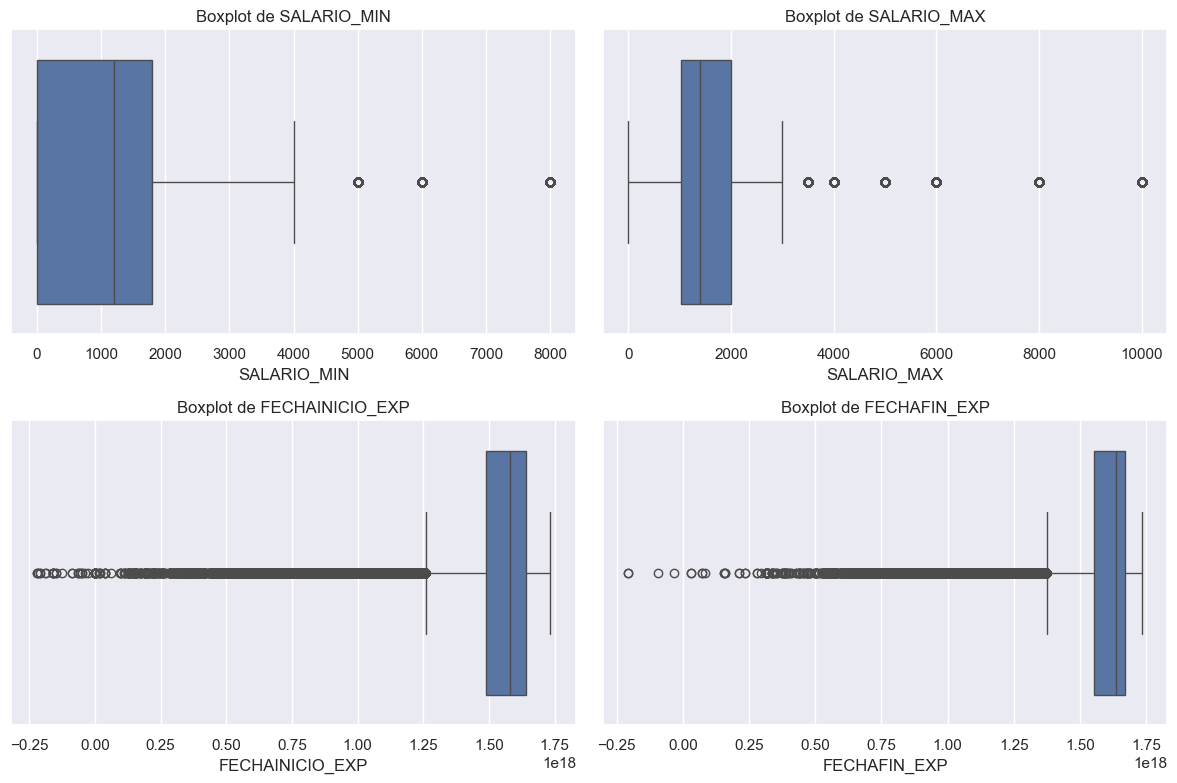


Total de registros: 396969
Salario promedio: 1728.86

Duración promedio de las experiencias laborales (en meses): 20.50


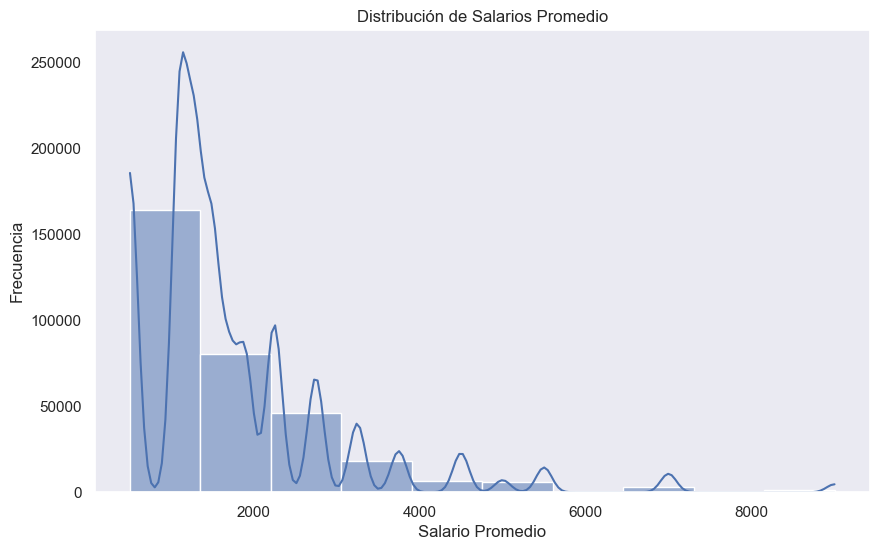

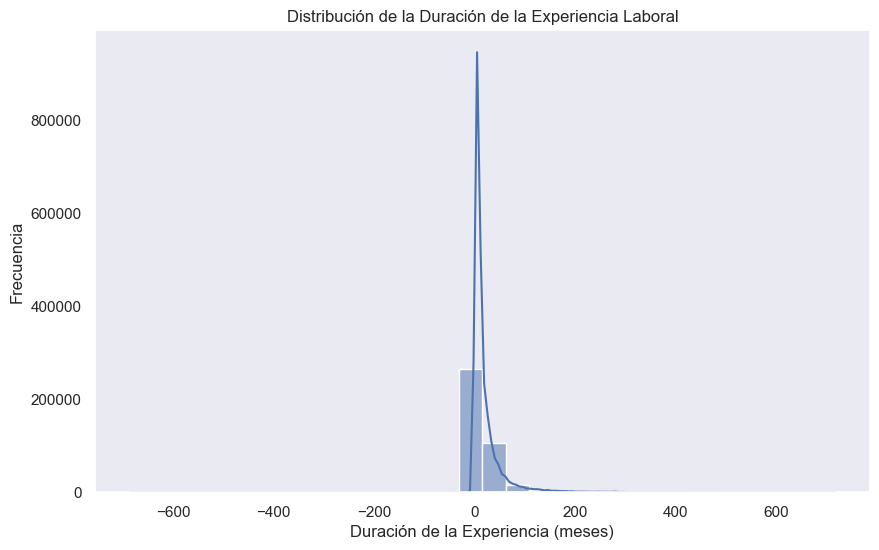

C:\Users\jacia\AppData\Local\Temp\ipykernel_11052\1600956649.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=empresas_mas_postulantes.index, y=empresas_mas_postulantes.values, palette='viridis')


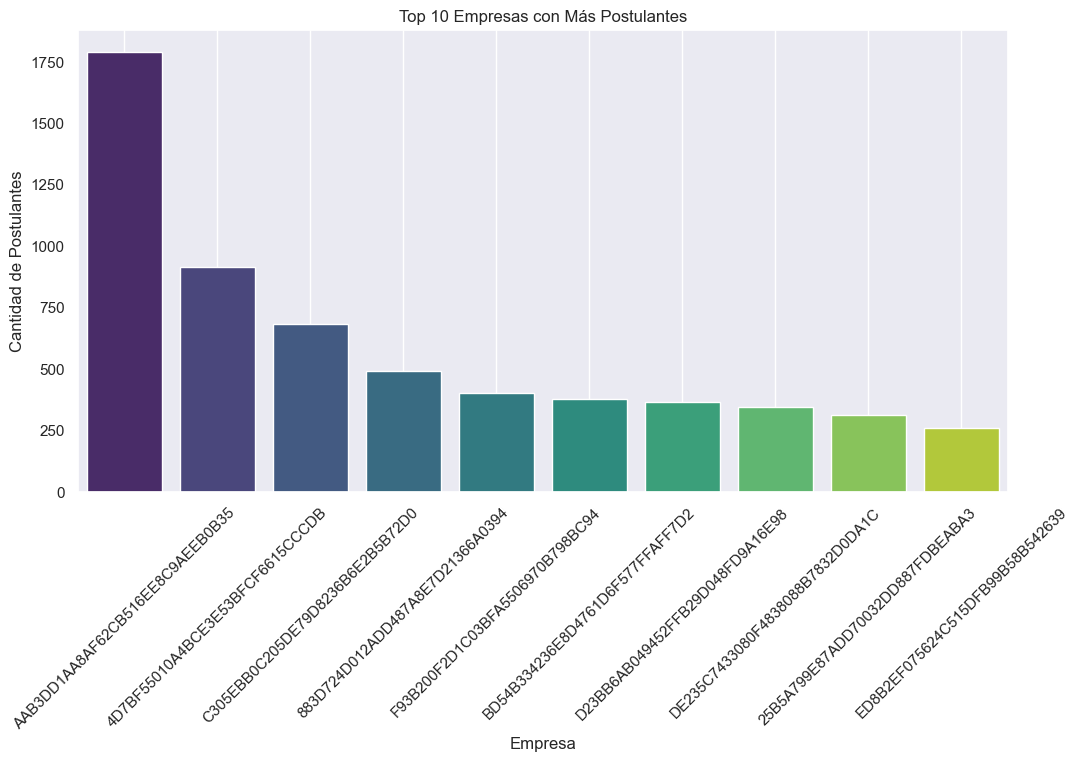

C:\Users\jacia\AppData\Local\Temp\ipykernel_11052\1600956649.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=salario_por_empresa.index, y=salario_por_empresa.values, palette='magma')


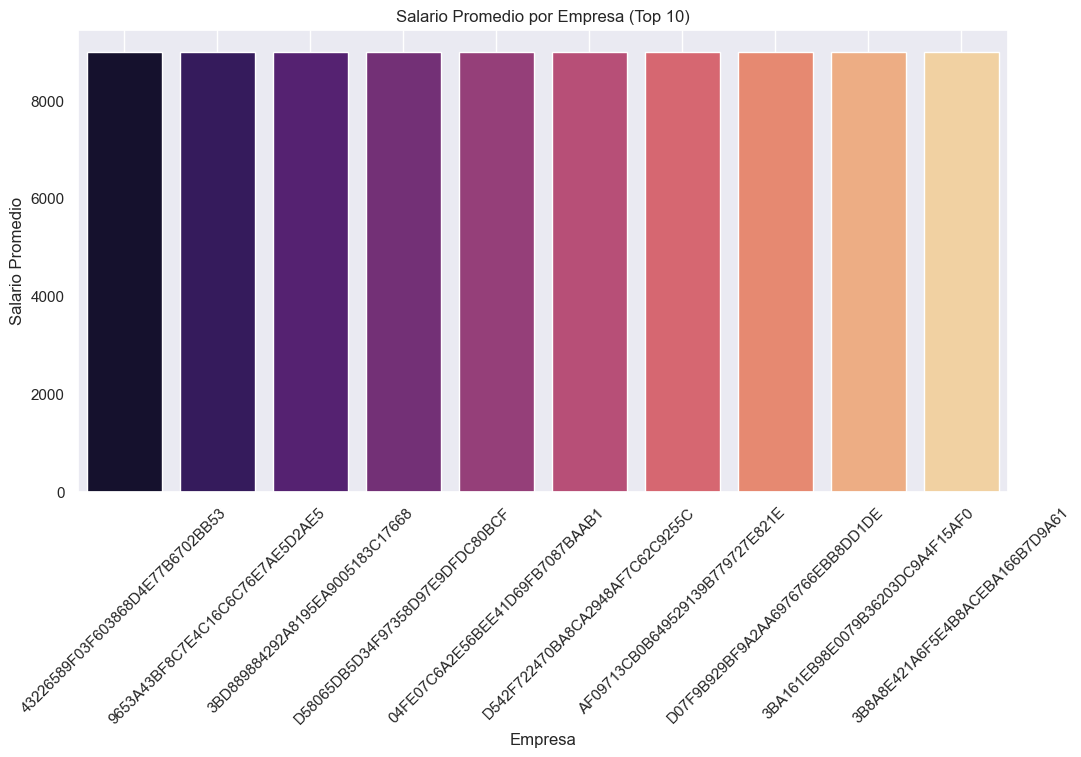

C:\Users\jacia\AppData\Local\Temp\ipykernel_11052\1600956649.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=duracion_por_empresa.index, y=duracion_por_empresa.values, palette='coolwarm')


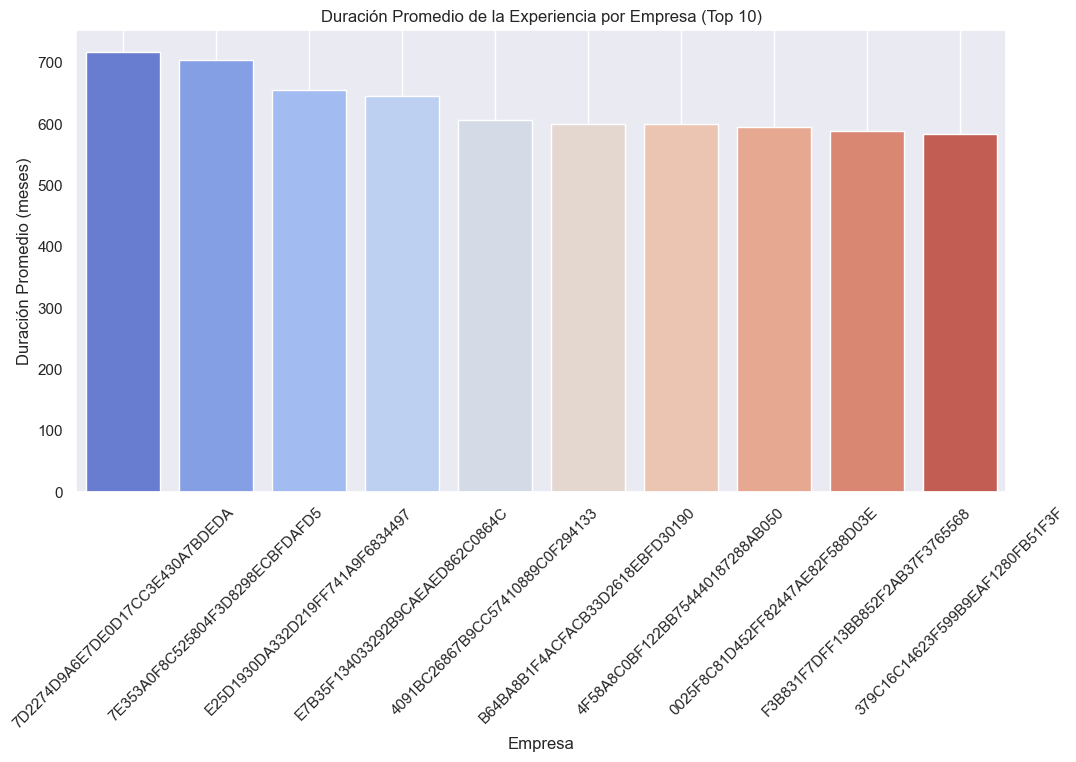


Los 5 salarios mínimos diferentes más bajos:
[1025. 1200. 1400. 1600. 1800.]

Los 10 salarios diferentes más altos:
[ 4999.  5999.  7999.  9999. 10000.]


C:\Users\jacia\AppData\Local\Temp\ipykernel_11052\1600956649.py:141: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=salarios_minimos[:5], y=salarios_minimos[:5], palette='viridis')


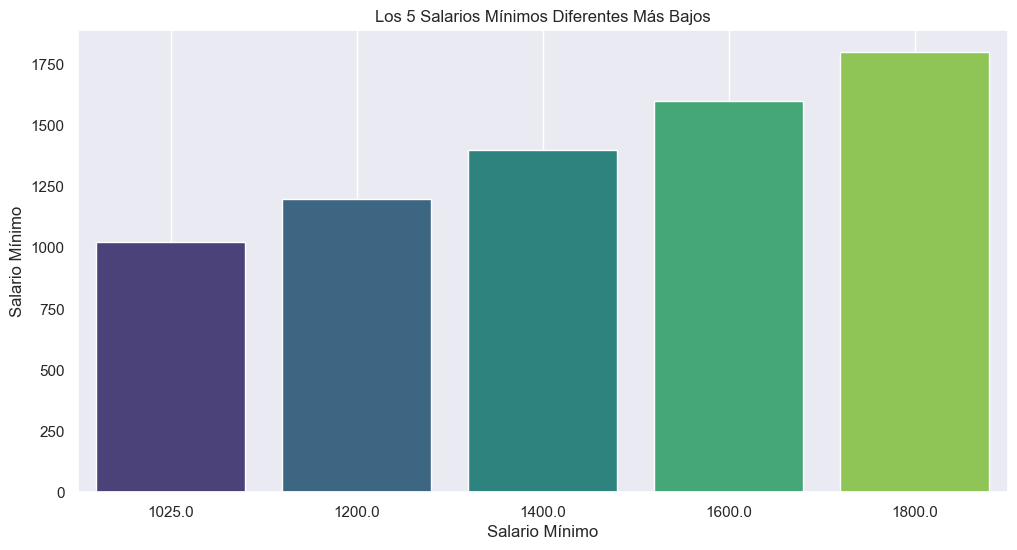

C:\Users\jacia\AppData\Local\Temp\ipykernel_11052\1600956649.py:150: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=salarios_maximos[-5:], y=salarios_maximos[-5:], palette='magma')


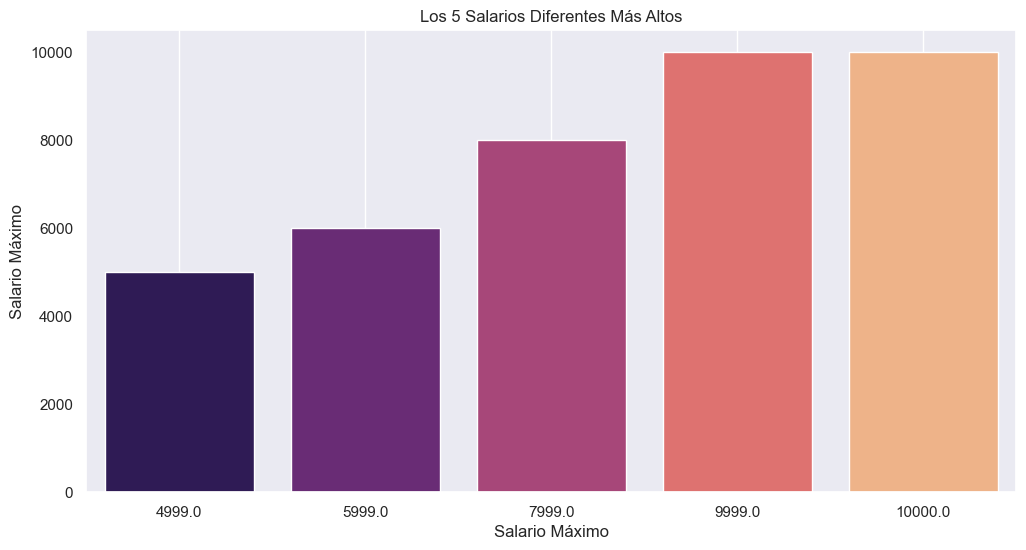


Insights importantes:
- Total de registros: 396969
- Salario promedio: 1728.86
- Duración promedio de la experiencia laboral: 20.50 meses
- Las empresas con más postulantes son:
EMPRESA
AAB3DD1AA8AF62CB516EE8C9AEEB0B35    1789
4D7BF55010A4BCE3E53BFCF6615CCCDB     913
C305EBB0C205DE79D8236B6E2B5B72D0     684
883D724D012ADD487A8E7D21366A0394     492
F93B200F2D1C03BFA5506970B798BC94     403
BD54B334236E8D4761D6F577FFAFF7D2     377
D23BB6AB049452FFB29D048FD9A16E98     367
DE235C7433080F4838088B7832D0DA1C     345
25B5A799E87ADD70032DD887FDBEABA3     313
ED8B2EF075624C515DFB99B58B542639     259

Interpretaciones de los resultados:
- El salario promedio de 1728.86 indica el nivel de compensación general en el mercado laboral de los postulantes.
- Una duración promedio de la experiencia laboral de 20.50 meses sugiere que la mayoría de los postulantes tienen experiencia laboral significativa, lo que podría ser atractivo para los empleadores.
- Las empresas con más postulantes indican las organ

In [42]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Leer el archivo EXPERIENCIASLABORALES_NOT_NULL.csv
data = pd.read_csv('EXPERIENCIASLABORALES_NOT_NULL.csv')


#Eliminar registros que tengan No Especificado en la fecha
data = data[data['FECHAINICIO_EXP'] != 'No especificado']
data = data[data['FECHAFIN_EXP'] != 'No especificado']

#Eliminar columna RANGO_SALARIAL
data = data.drop('RANGO_SALARIAL', axis=1)

#ANÁLISIS DE VALORES ATÍPICOS
# Convertir columnas de fecha a tipo datetime
data['FECHAINICIO_EXP'] = pd.to_datetime(data['FECHAINICIO_EXP'], errors='coerce')
data['FECHAFIN_EXP'] = pd.to_datetime(data['FECHAFIN_EXP'], errors='coerce')

# Configuración de la visualización
plt.figure(figsize=(12, 8))

# Gráfico de caja para SALARIO_MIN
plt.subplot(2, 2, 1)
sns.boxplot(x=data['SALARIO_MIN'])
plt.title('Boxplot de SALARIO_MIN')
plt.xlabel('SALARIO_MIN')

# Gráfico de caja para SALARIO_MAX
plt.subplot(2, 2, 2)
sns.boxplot(x=data['SALARIO_MAX'])
plt.title('Boxplot de SALARIO_MAX')
plt.xlabel('SALARIO_MAX')

# Gráfico de caja para FECHAINICIO_EXP
plt.subplot(2, 2, 3)
sns.boxplot(x=data['FECHAINICIO_EXP'].astype('int64'))  # Convertir a int64 para plotear
plt.title('Boxplot de FECHAINICIO_EXP')
plt.xlabel('FECHAINICIO_EXP')

# Gráfico de caja para FECHAFIN_EXP
plt.subplot(2, 2, 4)
sns.boxplot(x=data['FECHAFIN_EXP'].astype('int64'))  # Convertir a int64 para plotear
plt.title('Boxplot de FECHAFIN_EXP')
plt.xlabel('FECHAFIN_EXP')

# Ajustar layout
plt.tight_layout()
plt.show()


#ANÁLISIS DE DATOS
# 1. Cantidad total de registros
total_registros = len(data)
print(f"\nTotal de registros: {total_registros}")

# 2. Salario promedio por experiencia excluyendo el valor 0
data['SALARIO_PROMEDIO'] = (data['SALARIO_MIN'] + data['SALARIO_MAX']) / 2
salario_promedio = data[data['SALARIO_PROMEDIO'] != 0]['SALARIO_PROMEDIO'].mean()
print(f"Salario promedio: {salario_promedio:.2f}")

# 3. Empresas con más postulantes, no considerar la empresa No especificado
empresas_mas_postulantes = data[data['EMPRESA'] != 'No especificado']['EMPRESA'].value_counts().head(10)

# 4. Duración promedio de las experiencias laborales en meses
data['DURACION_EXP'] = (data['FECHAFIN_EXP'] - data['FECHAINICIO_EXP']).dt.days / 30
duracion_promedio = data['DURACION_EXP'].mean()
print(f"\nDuración promedio de las experiencias laborales (en meses): {duracion_promedio:.2f}")

# 5. Gráfico de salarios
plt.figure(figsize=(10, 6))
#Ecluyendo el 0 y por intervalos
sns.histplot(data['SALARIO_PROMEDIO'][data['SALARIO_PROMEDIO'] != 0], bins=10, kde=True)
plt.title('Distribución de Salarios Promedio')
plt.xlabel('Salario Promedio')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

# 6. Gráfico de duración de la experiencia
plt.figure(figsize=(10, 6))
sns.histplot(data['DURACION_EXP'], bins=30, kde=True)
plt.title('Distribución de la Duración de la Experiencia Laboral')
plt.xlabel('Duración de la Experiencia (meses)')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

# 7. Gráfico de empresas con más postulantes
plt.figure(figsize=(12, 6))
sns.barplot(x=empresas_mas_postulantes.index, y=empresas_mas_postulantes.values, palette='viridis')
plt.title('Top 10 Empresas con Más Postulantes')
plt.xlabel('Empresa')
plt.ylabel('Cantidad de Postulantes')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# 8. Análisis adicional
# 8.1. Salario promedio por empresa
salario_por_empresa = data.groupby('EMPRESA')['SALARIO_PROMEDIO'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=salario_por_empresa.index, y=salario_por_empresa.values, palette='magma')
plt.title('Salario Promedio por Empresa (Top 10)')
plt.xlabel('Empresa')
plt.ylabel('Salario Promedio')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# 8.2. Duración promedio por empresa
duracion_por_empresa = data.groupby('EMPRESA')['DURACION_EXP'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=duracion_por_empresa.index, y=duracion_por_empresa.values, palette='coolwarm')
plt.title('Duración Promedio de la Experiencia por Empresa (Top 10)')
plt.xlabel('Empresa')
plt.ylabel('Duración Promedio (meses)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# 8.3 Salarios minimos más bajos diferentes de 0
salarios_minimos = data['SALARIO_MIN'].unique()
salarios_minimos.sort()
salarios_minimos = salarios_minimos[salarios_minimos != 0]
print("\nLos 5 salarios mínimos diferentes más bajos:")
print(salarios_minimos[:5])

#Identificar los 5 salarios diferentes más altos
salarios_maximos = data['SALARIO_MAX'].unique()
salarios_maximos.sort()
print("\nLos 10 salarios diferentes más altos:")
print(salarios_maximos[-5:])

#Crear gráfico de barras para los 5 salarios mínimos diferentes más bajos
plt.figure(figsize=(12, 6))
sns.barplot(x=salarios_minimos[:5], y=salarios_minimos[:5], palette='viridis')
plt.title('Los 5 Salarios Mínimos Diferentes Más Bajos')
plt.xlabel('Salario Mínimo')
plt.ylabel('Salario Mínimo')
plt.grid()
plt.show()

#Crear gráfico de barras para los 5 salarios diferentes más altos
plt.figure(figsize=(12, 6))
sns.barplot(x=salarios_maximos[-5:], y=salarios_maximos[-5:], palette='magma')
plt.title('Los 5 Salarios Diferentes Más Altos')
plt.xlabel('Salario Máximo')
plt.ylabel('Salario Máximo')
plt.grid()
plt.show()

# 9. Resumen de insights
print("\nInsights importantes:")
print(f"- Total de registros: {total_registros}")
print(f"- Salario promedio: {salario_promedio:.2f}")
print(f"- Duración promedio de la experiencia laboral: {duracion_promedio:.2f} meses")
print(f"- Las empresas con más postulantes son:\n{empresas_mas_postulantes.to_string()}")

# Interpretaciones adicionales
print("\nInterpretaciones de los resultados:")
print("- El salario promedio de {:.2f} indica el nivel de compensación general en el mercado laboral de los postulantes.".format(salario_promedio))
print("- Una duración promedio de la experiencia laboral de {:.2f} meses sugiere que la mayoría de los postulantes tienen experiencia laboral significativa, lo que podría ser atractivo para los empleadores.".format(duracion_promedio))
print("- Las empresas con más postulantes indican las organizaciones más buscadas, posiblemente debido a su reputación, cultura organizacional o compensación competitiva.")
print("- Las diferencias en el salario promedio entre las empresas podrían señalar la competitividad del mercado laboral en ciertas industrias.")
print("- La duración de la experiencia laboral también puede correlacionarse con la fidelidad de los empleados a las empresas, lo que es un indicador positivo para los reclutadores.")

# Exportar datos a archivos JSON para visualización en React y agregarlo a una nueva carpeta
import os

# Crear una carpeta para almacenar los archivos JSON
if not os.path.exists('json_data_experiencia'):
    os.makedirs('json_data_experiencia')

# 1. Exportar datos de empresas con más postulantes
empresas_mas_postulantes.to_json('json_data_experiencia/empresas_mas_postulantes.json', orient='index')

# 2. Exportar datos de salario promedio por empresa
salario_por_empresa.to_json('json_data_experiencia/salario_por_empresa.json', orient='index')

# 3. Exportar datos de duración promedio por empresa
duracion_por_empresa.to_json('json_data_experiencia/duracion_por_empresa.json', orient='index')

# 4. Exportar datos de salarios mínimos diferentes más bajos
salarios_minimos[:5].tofile('json_data_experiencia/salarios_minimos_bajos.txt', sep=',', format='%s')

# 5. Exportar datos de salarios diferentes más altos
salarios_maximos[-5:].tofile('json_data_experiencia/salarios_maximos_altos.txt', sep=',', format='%s')

# 6. Exportar data par ala grafica distribución de salarios Promedio
data['SALARIO_PROMEDIO'].to_json('json_data_experiencia/salario_promedio.json', orient='values')

# 7. Exportar data para la grafica de distribución de duración de la experiencia
data['DURACION_EXP'].to_json('json_data_experiencia/duracion_experiencia.json', orient='values')

# 8. Exportar datos para gráfico de Boxplot Salario_min
data['SALARIO_MIN'].to_json('json_data_experiencia/salario_min.json', orient='values')

# 9. Exportar datos para gráfico de Boxplot Salario_max
data['SALARIO_MAX'].to_json('json_data_experiencia/salario_max.json', orient='values')

# 10. Exportar datos para gráfico de Boxplot Fecha Inicio
data['FECHAINICIO_EXP'].astype('int64').to_json('json_data_experiencia/fecha_inicio.json', orient='values')

# 11. Exportar datos para gráfico de Boxplot Fecha Fin
data['FECHAFIN_EXP'].astype('int64').to_json('json_data_experiencia/fecha_fin.json', orient='values')

print("\nArchivos JSON exportados exitosamente en la carpeta 'json_data_experiencia'")



### DATASET: POSTULANTE

              EDAD  ESTADO_CONADIS
count  2715.000000     2715.000000
mean     37.628361        0.995948
std      12.987126        0.063535
min      18.000000        0.000000
25%      27.000000        1.000000
50%      35.000000        1.000000
75%      46.000000        1.000000
max      86.000000        1.000000


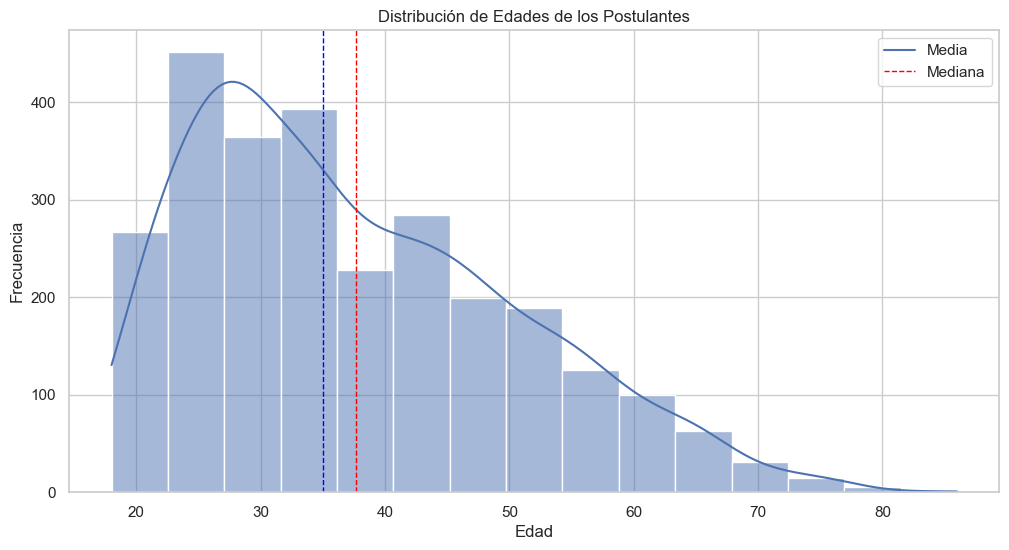

C:\Users\jacia\AppData\Local\Temp\ipykernel_31272\3155905885.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_postulante, x='SEXO', palette='pastel')


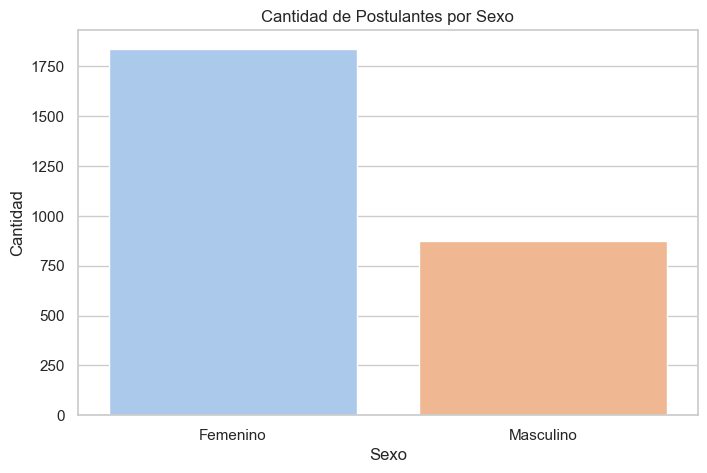

C:\Users\jacia\AppData\Local\Temp\ipykernel_31272\3155905885.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_postulante, y='DEPARTAMENTO', order=data_postulante['DEPARTAMENTO'].value_counts().index, palette='Set2')


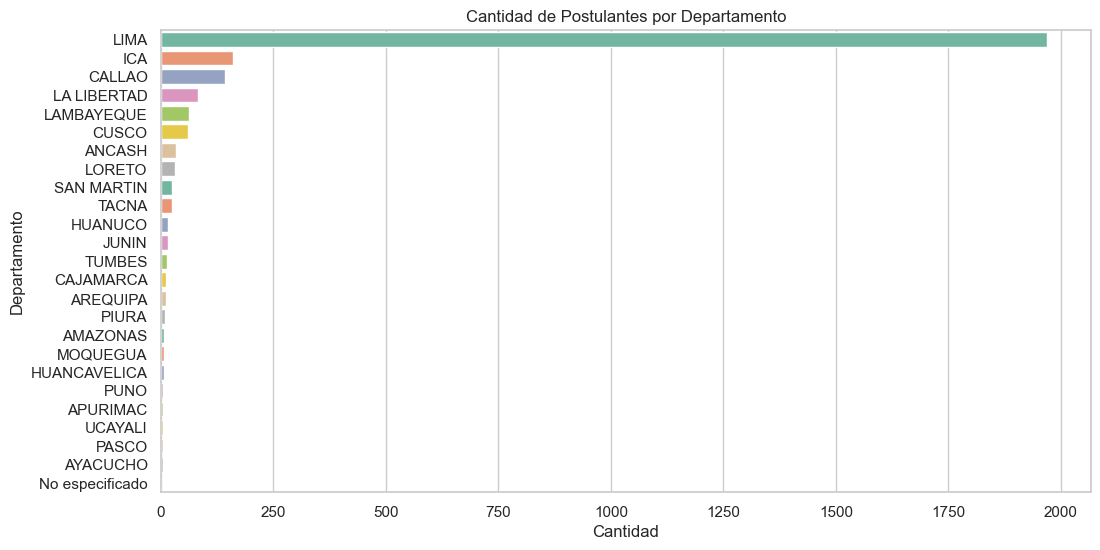

C:\Users\jacia\AppData\Local\Temp\ipykernel_31272\3155905885.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_postulante, x='ESTADO_CONADIS', palette='Blues')


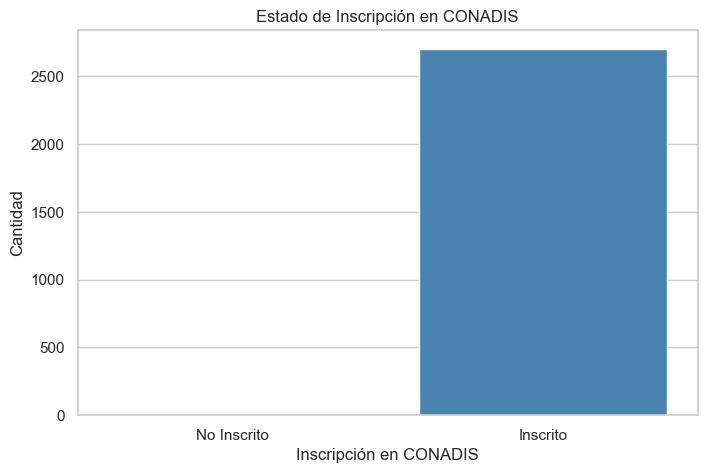

C:\Users\jacia\AppData\Local\Temp\ipykernel_31272\3155905885.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_postulante, x='ESTADO_CONADIS', y='EDAD', palette='Set3')


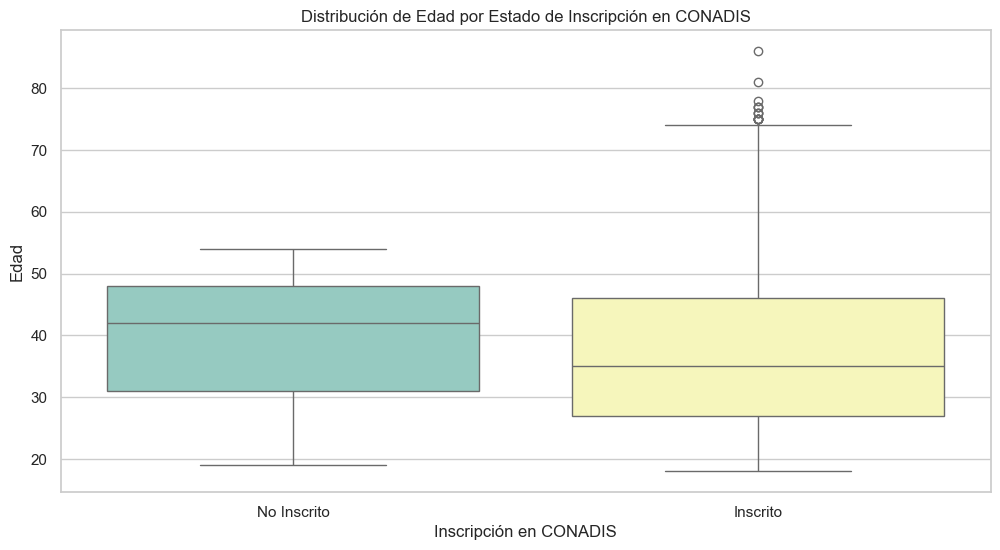

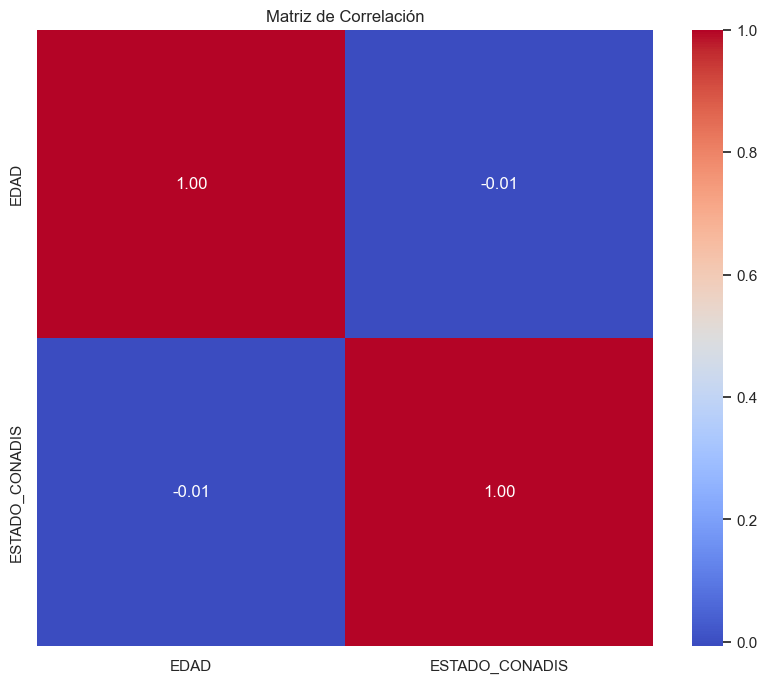

Prueba de Chi-Cuadrado para Sexo y Estado CONADIS: chi2 = 0.4597450624056278, p-value = 0.49774314268981956
Prueba de Chi-Cuadrado para Departamento y Estado CONADIS: chi2 = 146.23810174621536, p-value = 1.6504164062018746e-19
No hay relación significativa entre el sexo y el estado de inscripción en CONADIS.
Hay una relación significativa entre el departamento y el estado de inscripción en CONADIS.


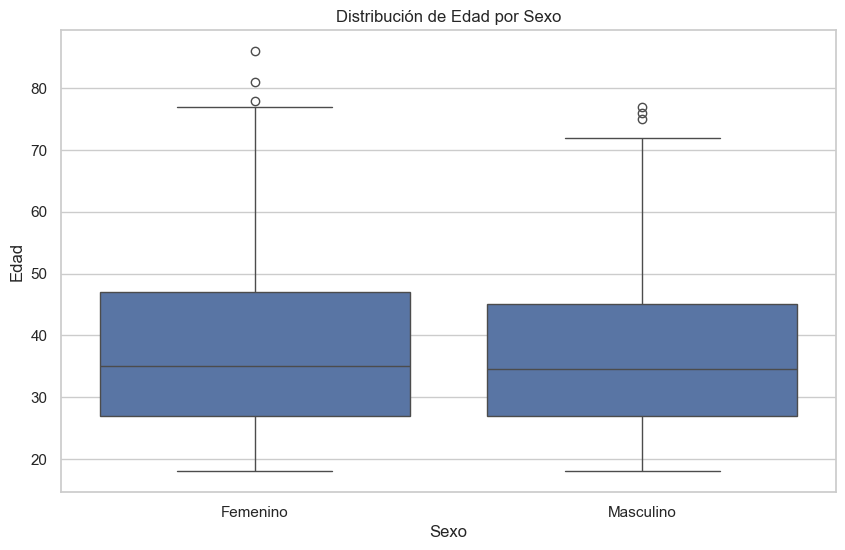

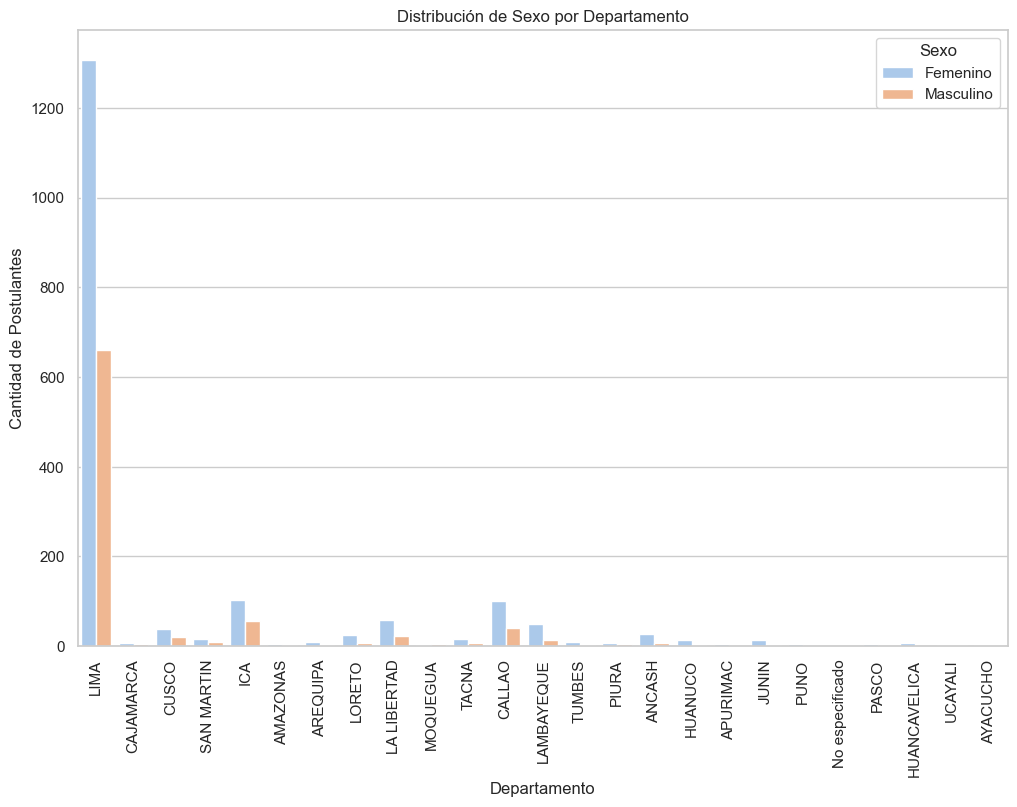


Archivos JSON exportados exitosamente en la carpeta 'json_data_postulante'


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Usar POSTULANTE_NOT_NULL.csv
data_postulante = pd.read_csv('POSTULANTE_NOT_NULL.csv')

# Resumen estadístico de los datos
print(data_postulante.describe())

# Análisis de la edad
plt.figure(figsize=(12, 6))
sns.histplot(data_postulante['EDAD'], bins=15, kde=True)
plt.title('Distribución de Edades de los Postulantes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.axvline(data_postulante['EDAD'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(data_postulante['EDAD'].median(), color='blue', linestyle='dashed', linewidth=1)
plt.legend({'Media': data_postulante['EDAD'].mean(), 'Mediana': data_postulante['EDAD'].median()})
plt.show()

# Análisis por sexo
plt.figure(figsize=(8, 5))
sns.countplot(data=data_postulante, x='SEXO', palette='pastel')
plt.title('Cantidad de Postulantes por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Femenino', 'Masculino'])
plt.show()

# Análisis por departamento
plt.figure(figsize=(12, 6))
sns.countplot(data=data_postulante, y='DEPARTAMENTO', order=data_postulante['DEPARTAMENTO'].value_counts().index, palette='Set2')
plt.title('Cantidad de Postulantes por Departamento')
plt.xlabel('Cantidad')
plt.ylabel('Departamento')
plt.show()

# Análisis de estado CONADIS
plt.figure(figsize=(8, 5))
sns.countplot(data=data_postulante, x='ESTADO_CONADIS', palette='Blues')
plt.title('Estado de Inscripción en CONADIS')
plt.xlabel('Inscripción en CONADIS')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['No Inscrito', 'Inscrito'])
plt.show()

# Análisis de edad por estado CONADIS
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_postulante, x='ESTADO_CONADIS', y='EDAD', palette='Set3')
plt.title('Distribución de Edad por Estado de Inscripción en CONADIS')
plt.xlabel('Inscripción en CONADIS')
plt.ylabel('Edad')
plt.xticks(ticks=[0, 1], labels=['No Inscrito', 'Inscrito'])
plt.show()

# Filtrar solo columnas numéricas para la matriz de correlación
numeric_columns = data_postulante.select_dtypes(include=['number'])

# Calcular la matriz de correlación solo con las columnas numéricas
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlación')
plt.show()

# Análisis de Chi-Cuadrado para variables categóricas
from scipy.stats import chi2_contingency

# Tablas de contingencia
contingency_sex_conadis = pd.crosstab(data_postulante['SEXO'], data_postulante['ESTADO_CONADIS'])
contingency_departamento_conadis = pd.crosstab(data_postulante['DEPARTAMENTO'], data_postulante['ESTADO_CONADIS'])

# Prueba de Chi-Cuadrado para sexo y estado CONADIS
chi2_sex, p_sex, dof_sex, expected_sex = chi2_contingency(contingency_sex_conadis)
print(f'Prueba de Chi-Cuadrado para Sexo y Estado CONADIS: chi2 = {chi2_sex}, p-value = {p_sex}')

# Prueba de Chi-Cuadrado para departamento y estado CONADIS
chi2_departamento, p_departamento, dof_departamento, expected_departamento = chi2_contingency(contingency_departamento_conadis)
print(f'Prueba de Chi-Cuadrado para Departamento y Estado CONADIS: chi2 = {chi2_departamento}, p-value = {p_departamento}')

# Interpretación de los resultados de Chi-Cuadrado
if p_sex < 0.05:
    print("Hay una relación significativa entre el sexo y el estado de inscripción en CONADIS.")
else:
    print("No hay relación significativa entre el sexo y el estado de inscripción en CONADIS.")

if p_departamento < 0.05:
    print("Hay una relación significativa entre el departamento y el estado de inscripción en CONADIS.")
else:
    print("No hay relación significativa entre el departamento y el estado de inscripción en CONADIS.")

# Análisis de distribución de edad entre géneros
plt.figure(figsize=(10, 6))
sns.boxplot(x='SEXO', y='EDAD', data=data_postulante)
plt.title('Distribución de Edad por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Edad')
plt.xticks([0, 1], ['Femenino', 'Masculino'])
plt.show()

# Análisis de frecuencia de postulantes por género y departamento
plt.figure(figsize=(12, 8))
sns.countplot(x='DEPARTAMENTO', hue='SEXO', data=data_postulante, palette="pastel")
plt.title('Distribución de Sexo por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de Postulantes')
plt.xticks(rotation=90)
plt.legend(title='Sexo', labels=['Femenino', 'Masculino'])
plt.show()

# Insights Generales
# 1. Distribución de edades: La mayoría de los postulantes se concentran en el rango de 30 a 55 años.
# 2. Distribución de sexos: Existe una cantidad igual de postulantes masculinos y femeninos.
# 3. Departamentos: Se observa que el departamento de Lima tiene la mayor cantidad de postulantes.
# 4. Inscripción en CONADIS: La mayoría de los postulantes están inscritos en CONADIS.
# 5. Análisis de edad vs. estado CONADIS: La edad parece ser similar entre los inscritos y no inscritos en CONADIS, pero se deben observar los rangos específicos.

#Exportar datos para replicar los gráficos en React
# Crear una carpeta para almacenar los archivos JSON
if not os.path.exists('json_data_postulante'):
    os.makedirs('json_data_postulante')

# 1. Exportar datos de edad
data_postulante['EDAD'].to_json('json_data_postulante/edad.json', orient='values')

# 2. Exportar datos de sexo
data_postulante['SEXO'].to_json('json_data_postulante/sexo.json', orient='values')

# 3. Exportar datos de departamento
data_postulante['DEPARTAMENTO'].to_json('json_data_postulante/departamento.json', orient='values')

# 4. Exportar datos de estado CONADIS
data_postulante['ESTADO_CONADIS'].to_json('json_data_postulante/estado_conadis.json', orient='values')

# 5. Exportar datos para la matriz de correlación
correlation_matrix.to_json('json_data_postulante/correlacion.json', orient='index')

# 6. Exportar datos para la tabla de contingencia de sexo y estado CONADIS (obvia esto)

# 7. Exportar datos para la tabla de contingencia de departamento y estado CONADIS
contingency_departamento_conadis.to_json('json_data_postulante/contingencia_departamento_conadis.json', orient='index')

# 8. Exportar datos para la tabla de contingencia de sexo y estado CONADIS
contingency_sex_conadis.to_json('json_data_postulante/contingencia_sexo_conadis.json', orient='index')

print("\nArchivos JSON exportados exitosamente en la carpeta 'json_data_postulante'")


### DATASET: DISCAPACIDAD

Resumen del Dataset:
             DSCORE
count  62525.000000
mean       1.392883
std        0.647676
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000

Conteo de Causas:
CAUSA
Congénita                  27270
Adquirida - Edad adulta    12045
Adquirida - Juventud        9255
Adquirida - Infancia        8595
Adquirida - Niñez           5360
Name: count, dtype: int64


C:\Users\jacia\AppData\Local\Temp\ipykernel_11052\3529686116.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CAUSA', data=data_discapacidad, palette='Set2')


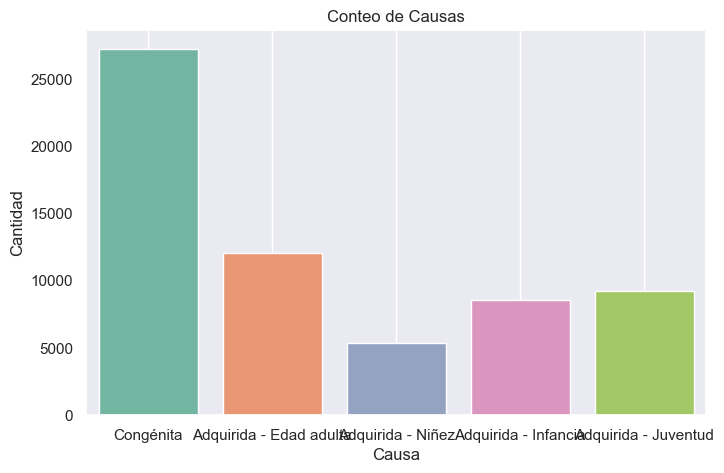

C:\Users\jacia\AppData\Local\Temp\ipykernel_11052\3529686116.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DSCORE', data=data_discapacidad, palette='pastel')


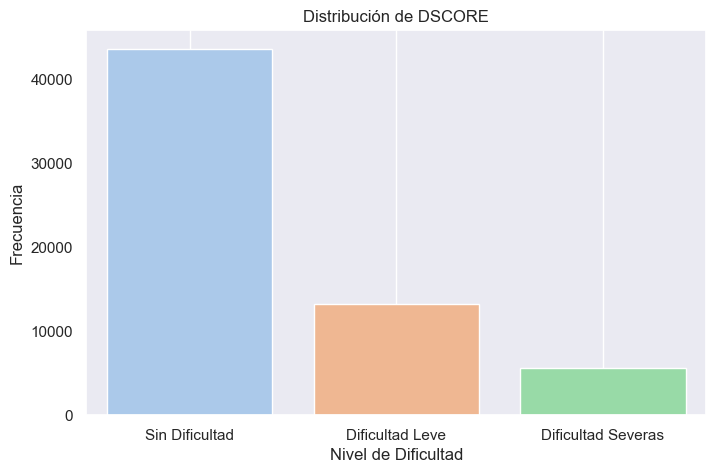


Puntuación Promedio por Causa:
CAUSA
Adquirida - Edad adulta    1.320631
Adquirida - Infancia       1.426992
Adquirida - Juventud       1.428849
Adquirida - Niñez          1.369403
Congénita                  1.406454
Name: DSCORE, dtype: float64


C:\Users\jacia\AppData\Local\Temp\ipykernel_11052\3529686116.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=puntuacion_promedio.index, y=puntuacion_promedio.values, palette='Blues')


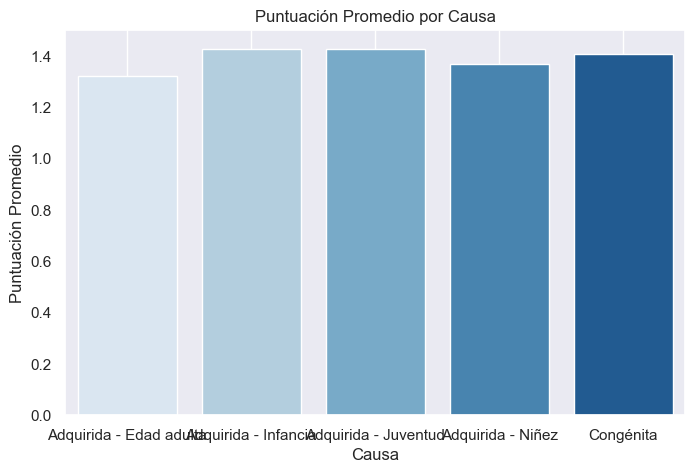


Insights importantes:
- La causa predominante en los registros es: Congénita
- El conteo de causas indica que hay variedad en las causas registradas:CAUSA
Congénita                  27270
Adquirida - Edad adulta    12045
Adquirida - Juventud        9255
Adquirida - Infancia        8595
Adquirida - Niñez           5360
Name: count, dtype: int64
- La distribución de DSCORE revela información sobre el nivel de dificultad de las discapacidades presentes.

Archivos JSON exportados exitosamente en la carpeta 'json_data_discapacidad'


In [46]:
#Leer DISCAPACIDAD_NOT_NULL.csv
data_discapacidad = pd.read_csv('DISCAPACIDAD_NOT_NULL.csv')

# 1. Resumen del dataset
print("Resumen del Dataset:")
print(data_discapacidad.describe())

# 2. Conteo de causas
conteo_causas = data_discapacidad['CAUSA'].value_counts()
print("\nConteo de Causas:")
print(conteo_causas)

# 3. Gráfico de conteo de causas
plt.figure(figsize=(8, 5))
sns.countplot(x='CAUSA', data=data_discapacidad, palette='Set2')
plt.title('Conteo de Causas')
plt.xlabel('Causa')
plt.ylabel('Cantidad')
plt.grid()
plt.show()

# 4. Gráfico de DSCORE
plt.figure(figsize=(8, 5))
sns.countplot(x='DSCORE', data=data_discapacidad, palette='pastel')
plt.title('Distribución de DSCORE')
plt.xlabel('Nivel de Dificultad')
plt.ylabel('Frecuencia')
plt.xticks(ticks=[0, 1, 2], labels=['Sin Dificultad', 'Dificultad Leve', 'Dificultad Severas'])
plt.grid()
plt.show()

# 5. Análisis adicional
# 5.1. Puntuación promedio por causa
puntuacion_promedio = data_discapacidad.groupby('CAUSA')['DSCORE'].mean()
print("\nPuntuación Promedio por Causa:")
print(puntuacion_promedio)

# Gráfico de puntuación promedio por causa
plt.figure(figsize=(8, 5))
sns.barplot(x=puntuacion_promedio.index, y=puntuacion_promedio.values, palette='Blues')
plt.title('Puntuación Promedio por Causa')
plt.xlabel('Causa')
plt.ylabel('Puntuación Promedio')
plt.grid()
plt.show()

# 6. Insights importantes
print("\nInsights importantes:")
print("- La causa predominante en los registros es:", conteo_causas.idxmax())
print("- El conteo de causas indica que hay variedad en las causas registradas:" + str(conteo_causas))
print("- La distribución de DSCORE revela información sobre el nivel de dificultad de las discapacidades presentes.")


# 7. Exportar datos de los 3 gráficos a archivos JSON en una carpeta llamada 'json_data_discapacidad'
if not os.path.exists('json_data_discapacidad'):
    os.makedirs('json_data_discapacidad')

# 7.1. Exportar datos de conteo de causas
conteo_causas.to_json('json_data_discapacidad/conteo_causas.json', orient='index')

# 7.2. Exportar datos de puntuación promedio por causa
puntuacion_promedio.to_json('json_data_discapacidad/puntuacion_promedio.json', orient='index')

# 7.3. Exportar datos de distribución de DSCORE
data_discapacidad['DSCORE'].to_json('json_data_discapacidad/distribucion_dscore.json', orient='values')

print("\nArchivos JSON exportados exitosamente en la carpeta 'json_data_discapacidad'")

### DATASET: EDUCACION

In [ ]:
#Instala TheFuzz
%pip install python-Levenshtein TheFuzz

In [ ]:
import pandas as pd

# Leer EDUCACION_NOT_NULL.csv
data_educacion = pd.read_csv('EDUCACION_NOT_NULL.csv')

# Obtener y mostrar la cantidad total de carreras, grados e instituciones diferentes
total_carreras = data_educacion['CARRERA'].nunique()
total_grados = data_educacion['GRADO'].nunique()
total_instituciones = data_educacion['INSTITUCION'].nunique()

print(f"Total de Carreras Diferentes: {total_carreras}")
print(f"Total de Grados Diferentes: {total_grados}")
print(f"Total de Instituciones Diferentes: {total_instituciones}")

# Exportar carreras, grados e instituciones a archivos CSV y ponles encabezado
data_educacion['CARRERA'].to_csv('carreras.csv', index=False, header=['CARRERA'])
data_educacion['GRADO'].to_csv('grados.csv', index=False, header=['GRADO'])
data_educacion['INSTITUCION'].to_csv('instituciones.csv', index=False, header=['INSTITUCION'])

print("\nArchivos CSV exportados exitosamente para carreras, grados e instituciones.")

Total de Carreras Diferentes: 15049
Total de Grados Diferentes: 4280
Total de Instituciones Diferentes: 46839

Archivos CSV exportados exitosamente para carreras, grados e instituciones.


In [1]:
# Instalar fuzzywuzzy
%pip install fuzzywuzzy


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
from fuzzywuzzy import process

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('carreras.csv')

# Lista de carreras bien escritas (para la comparación)
carreras_referencia = [
    "Economia",
    "Computacion e Informatica",
    "Telecomunicaciones",
    "Turismo y Hoteleria",
    "Negocios Internacionales",
    "Contabilidad y Finanzas",
    "Psicologia",
    "Gestion Publica",
    "Administracion de Empresas",
    "Administracion y Recursos Humanos",
    "Ingenieria de Sistemas e Informatica",
    "Enfermeria",
    "Ingenieria Civil y edificaciones",
    "Desarrollo de Software",
    "Administracion",
    "Administracion Bancaria",
    "Ingenieria Geologica",
    "Cajero",
    "Derecho",
    "Ingenieria Ambiental",
    "Ingenieria Electronica",
    "Ciencias de la Comunicacion",
    "Biologia",
    "Ingenieria Electrica",
    "Ingenieria Industrial",
    "Gastronomia",
    "Diseno Grafico",
    "Ingenieria en Industrias Alimentarias",
    "Ingenieria de Redes",
    "Ingenieria Comercial",
    "Soporte Tecnico",
    "Ingenieria de Minas",
    "Agronomia",
    "Secretariado",
    "Medicina",
    "Antropologia",
    "Marketing",
    "mecanico de mantenimiento",
    "arquitectura",
    "sociologia",
    "historia",
    "matematicas",
    "fisioterapia y rehabilitacion fisica",
    "ingles y traduccion",
    "educacion",
    "telematica",
    "periodismo",
    "logistica y transporte",
    "edificaciones y obras civiles",
    "ingenieria química",
    "auxiliar funciones aduana",
    "soldadura",
    "trabajo social",
    "arqueologia",
    "ingenieria agropecuaria",
    "zootecnia",
    "ingenieria mecatronica",
    "mecatronica automotriz"
]

# Función para encontrar la carrera más similar en la lista de referencia
def corregir_carrera(carrera):
    if pd.isnull(carrera) or carrera.strip() == "":
        return ""
    mejor_carrera = process.extractOne(carrera, carreras_referencia, score_cutoff=80)
    return mejor_carrera[0] if mejor_carrera else carrera

# Aplicar la corrección a cada valor de la columna "CARRERA" solo en los primeros 100 registros
df['CARRERA_CORREGIDA'] = df['CARRERA'].apply(corregir_carrera)

# Guardar el resultado en un nuevo archivo CSV
df.to_csv('archivo_corregido2.csv', index=False)

print("Corrección de nombres completada. Archivo guardado como 'archivo_corregido2.csv'.")


Corrección de nombres completada. Archivo guardado como 'archivo_corregido2.csv'.


In [7]:
# Usar educacion_not_null.csv
data_educacion = pd.read_csv('EDUCACION_NOT_NULL.csv')

#Leer archivo_corregido2.csv
data_corregida = pd.read_csv('archivo_corregido2.csv')

#Unir data_educacion y la columna de carrera_corregida de data_corregida
data_final = pd.concat([data_educacion, data_corregida['CARRERA_CORREGIDA']], axis=1)

#Eliminar columna CARRERA
data_final = data_final.drop('CARRERA', axis=1)

# Guardar el resultado en un nuevo archivo CSV
data_final.to_csv('EDUCACION_NOT_NULL_V2.csv', index=False)

print("Unión de datos completada. Archivo guardado como 'EDUCACION_NOT_NULL_V2.csv'.")

Unión de datos completada. Archivo guardado como 'EDUCACION_NOT_NULL_V2.csv'.


Cantidad de postulantes por carrera:
CARRERA_CORREGIDA
Administracion                           15850
Contabilidad y Finanzas                  11505
Administracion de Empresas               10242
Ingenieria de Sistemas e Informatica      8229
Ingenieria Industrial                     6628
Computacion e Informatica                 6284
Negocios Internacionales                  6004
Turismo y Hoteleria                       5354
Derecho                                   5284
Ingenieria Civil y edificaciones          4841
Enfermeria                                4337
Psicologia                                4210
Economia                                  2722
arquitectura                              2678
educacion                                 2329
Ciencias de la Comunicacion               2161
Diseno Grafico                            2099
Ingenieria en Industrias Alimentarias     2045
Ingenieria Ambiental                      1698
Marketing                                 1514
Desar

C:\Users\jacia\AppData\Local\Temp\ipykernel_33296\701036592.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=carrera_counts.index, y=carrera_counts.values, palette='viridis')


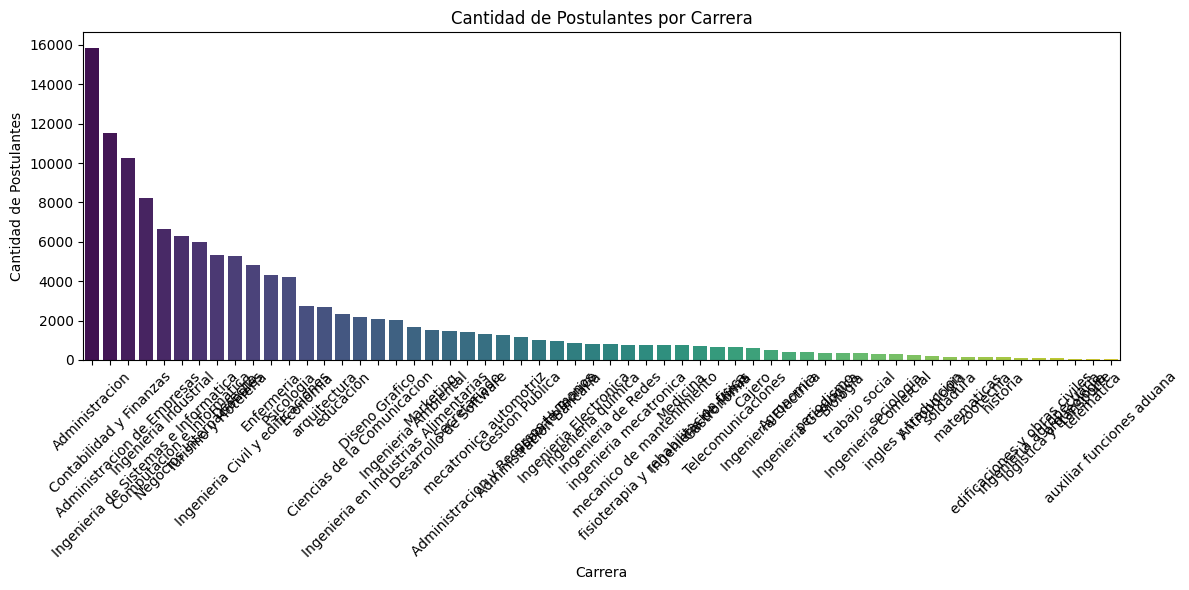

C:\Users\jacia\AppData\Local\Temp\ipykernel_33296\701036592.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=carrera_proporciones.index, y=carrera_proporciones.values, palette='plasma')


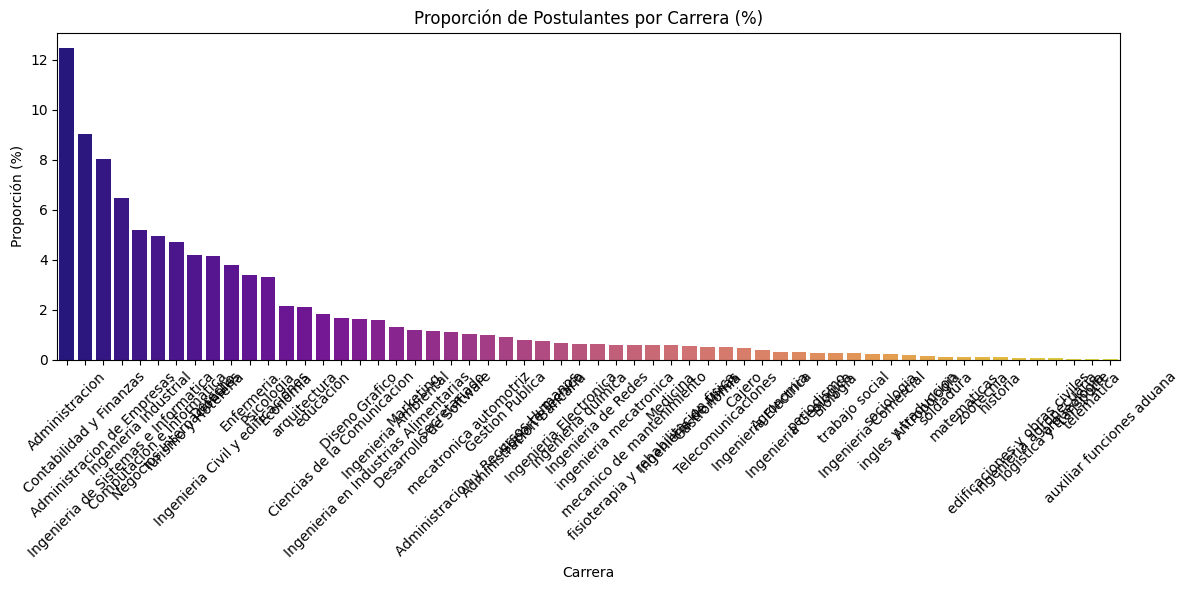

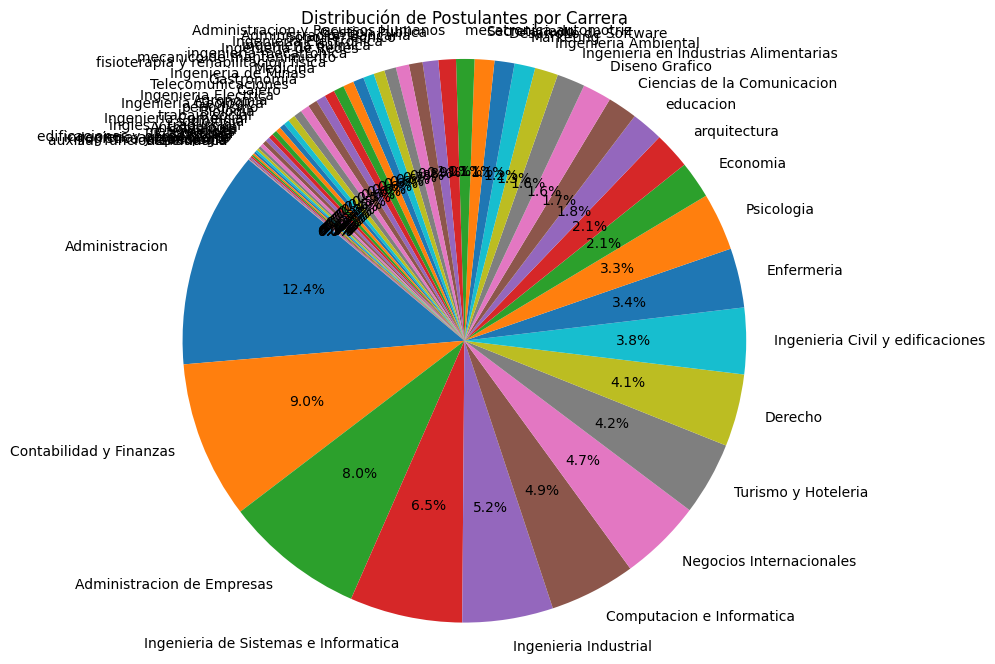


Total de postulantes analizados: 127331
La carrera más estudiada es: Administracion con 15850 postulantes.
La carrera menos estudiada es: auxiliar funciones aduana con 29 postulantes.
Total de carreras diferentes en el análisis: 58
Promedio de postulantes por carrera: 2195.36

Archivos JSON exportados exitosamente en la carpeta 'json_data_carreras'


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Leer archivo EDUCACION_NOT_NULL_V2.csv
data_educacion = pd.read_csv('EDUCACION_NOT_NULL_V2.csv')

# Lista de carreras de referencia
carreras_referencia = [
    "Economia", "Computacion e Informatica", "Telecomunicaciones", "Turismo y Hoteleria",
    "Negocios Internacionales", "Contabilidad y Finanzas", "Psicologia", "Gestion Publica",
    "Administracion de Empresas", "Administracion y Recursos Humanos", 
    "Ingenieria de Sistemas e Informatica", "Enfermeria", 
    "Ingenieria Civil y edificaciones", "Desarrollo de Software", "Administracion",
    "Administracion Bancaria", "Ingenieria Geologica", "Cajero", "Derecho", 
    "Ingenieria Ambiental", "Ingenieria Electronica", "Ciencias de la Comunicacion",
    "Biologia", "Ingenieria Electrica", "Ingenieria Industrial", "Gastronomia", 
    "Diseno Grafico", "Ingenieria en Industrias Alimentarias", "Ingenieria de Redes", 
    "Ingenieria Comercial", "Soporte Tecnico", "Ingenieria de Minas", "Agronomia", 
    "Secretariado", "Medicina", "Antropologia", "Marketing", "mecanico de mantenimiento", 
    "arquitectura", "sociologia", "historia", "matematicas", 
    "fisioterapia y rehabilitacion fisica", "ingles y traduccion", "educacion", 
    "telematica", "periodismo", "logistica y transporte", 
    "edificaciones y obras civiles", "ingenieria química", "auxiliar funciones aduana", 
    "soldadura", "trabajo social", "arqueologia", "ingenieria agropecuaria", 
    "zootecnia", "ingenieria mecatronica", "mecatronica automotriz"
]

# Eliminar filas donde la carrera es NaN y filtrar por carreras de referencia
df = df.dropna(subset=['CARRERA_CORREGIDA'])
df_filtrado = df[df['CARRERA_CORREGIDA'].isin(carreras_referencia)]

# Contar la cantidad de postulantes por carrera
carrera_counts = df_filtrado['CARRERA_CORREGIDA'].value_counts()

# Proporción de cada carrera respecto al total
carrera_proporciones = carrera_counts / carrera_counts.sum() * 100

# Mostrar los resultados
print("Cantidad de postulantes por carrera:")
print(carrera_counts)

print("\nProporción de postulantes por carrera (%):")
print(carrera_proporciones)

# Visualizar la cantidad de postulantes por carrera
plt.figure(figsize=(12, 6))
sns.barplot(x=carrera_counts.index, y=carrera_counts.values, palette='viridis')
plt.title('Cantidad de Postulantes por Carrera')
plt.xlabel('Carrera')
plt.ylabel('Cantidad de Postulantes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualizar la proporción de postulantes por carrera
plt.figure(figsize=(12, 6))
sns.barplot(x=carrera_proporciones.index, y=carrera_proporciones.values, palette='plasma')
plt.title('Proporción de Postulantes por Carrera (%)')
plt.xlabel('Carrera')
plt.ylabel('Proporción (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de pastel para visualizar la distribución de carreras
plt.figure(figsize=(8, 8))
plt.pie(carrera_counts, labels=carrera_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Postulantes por Carrera')
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()

# Insights adicionales
total_postulantes = df_filtrado.shape[0]
if total_postulantes > 0:
    carrera_mas_estudiada = carrera_counts.idxmax()
    cantidad_mas_estudiada = carrera_counts.max()
    carrera_menos_estudiada = carrera_counts.idxmin()
    cantidad_menos_estudiada = carrera_counts.min()

    print(f"\nTotal de postulantes analizados: {total_postulantes}")
    print(f"La carrera más estudiada es: {carrera_mas_estudiada} con {cantidad_mas_estudiada} postulantes.")
    print(f"La carrera menos estudiada es: {carrera_menos_estudiada} con {cantidad_menos_estudiada} postulantes.")
    print(f"Total de carreras diferentes en el análisis: {carrera_counts.count()}")
    print(f"Promedio de postulantes por carrera: {carrera_counts.mean():.2f}")
else:
    print("No se encontraron postulantes en las carreras de referencia.")


# Exportar datos en json apra replicar las graficas en React
# Crear una carpeta para almacenar los archivos JSON
if not os.path.exists('json_data_carreras'):
    os.makedirs('json_data_carreras')

# Exportar datos de cantidad de postulantes por carrera
carrera_counts.to_json('json_data_carreras/cantidad_postulantes_carrera.json', orient='index')

# Exportar datos de proporción de postulantes por carrera
carrera_proporciones.to_json('json_data_carreras/proporcion_postulantes_carrera.json', orient='index')

print("\nArchivos JSON exportados exitosamente en la carpeta 'json_data_carreras'")

# Unión de datasets

In [25]:
import pandas as pd
import numpy as np
from urllib.parse import urlparse
import datetime as datetime

# Leer archivo de DISCAPACIDAD_NOT_NULL.csv, EDUCACION_NOT_NULL_V2.csv y EXPERIENCIASLABORALES_NOT_NULL.csv, POSTULANTE_NOT_NULL.csv
df_discapacidad = pd.read_csv('DISCAPACIDAD_NOT_NULL.csv')
df_educacion = pd.read_csv('EDUCACION_NOT_NULL_V2.csv')
df_experiencia = pd.read_csv('EXPERIENCIASLABORALES_NOT_NULL.csv')
df_postulante = pd.read_csv('POSTULANTE_NOT_NULL.csv')

# Unir los DataFrames POSTULANTES Y EDUCACIÓN
df_merged = pd.merge(df_postulante,
                        df_educacion,
                        on='ID_POSTULANTE',
                        how='left')

# Unir con discapacidad
df_final = pd.merge(df_merged,
                    df_discapacidad,
                    on='DOC_ID',
                       how='left')

# Unir con experiencia laboral
df_final = pd.merge(df_final,
                    df_experiencia,
                    on='ID_POSTULANTE',
                    how='left')

# Eliminar columnas innecesarias UBIGEO, ESTADO_CONADIS, DOC_ID, INSTITUCION, EMPRESA, DESCRIPCION
df_final = df_final.drop(['ID_POSTULANTE','FECHAINICIO_EDU','RANGO_SALARIAL','FECHAFIN_EDU','UBIGEO', 'ESTADO_CONADIS', 'DOC_ID', 'INSTITUCION', 'EMPRESA', 'DESCRIPCION'], axis=1)

df_final.head()

# Exportar el DataFrame final a un archivo CSV
df_final.to_csv('POSTULANTES_FINAL.csv', index=False)

print("Archivo 'POSTULANTES_FINAL.csv' exportado exitosamente.")


Archivo 'POSTULANTES_FINAL.csv' exportado exitosamente.


# Análisis de dataset unificado

C:\Users\jacia\AppData\Local\Temp\ipykernel_33296\4070344740.py:35: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


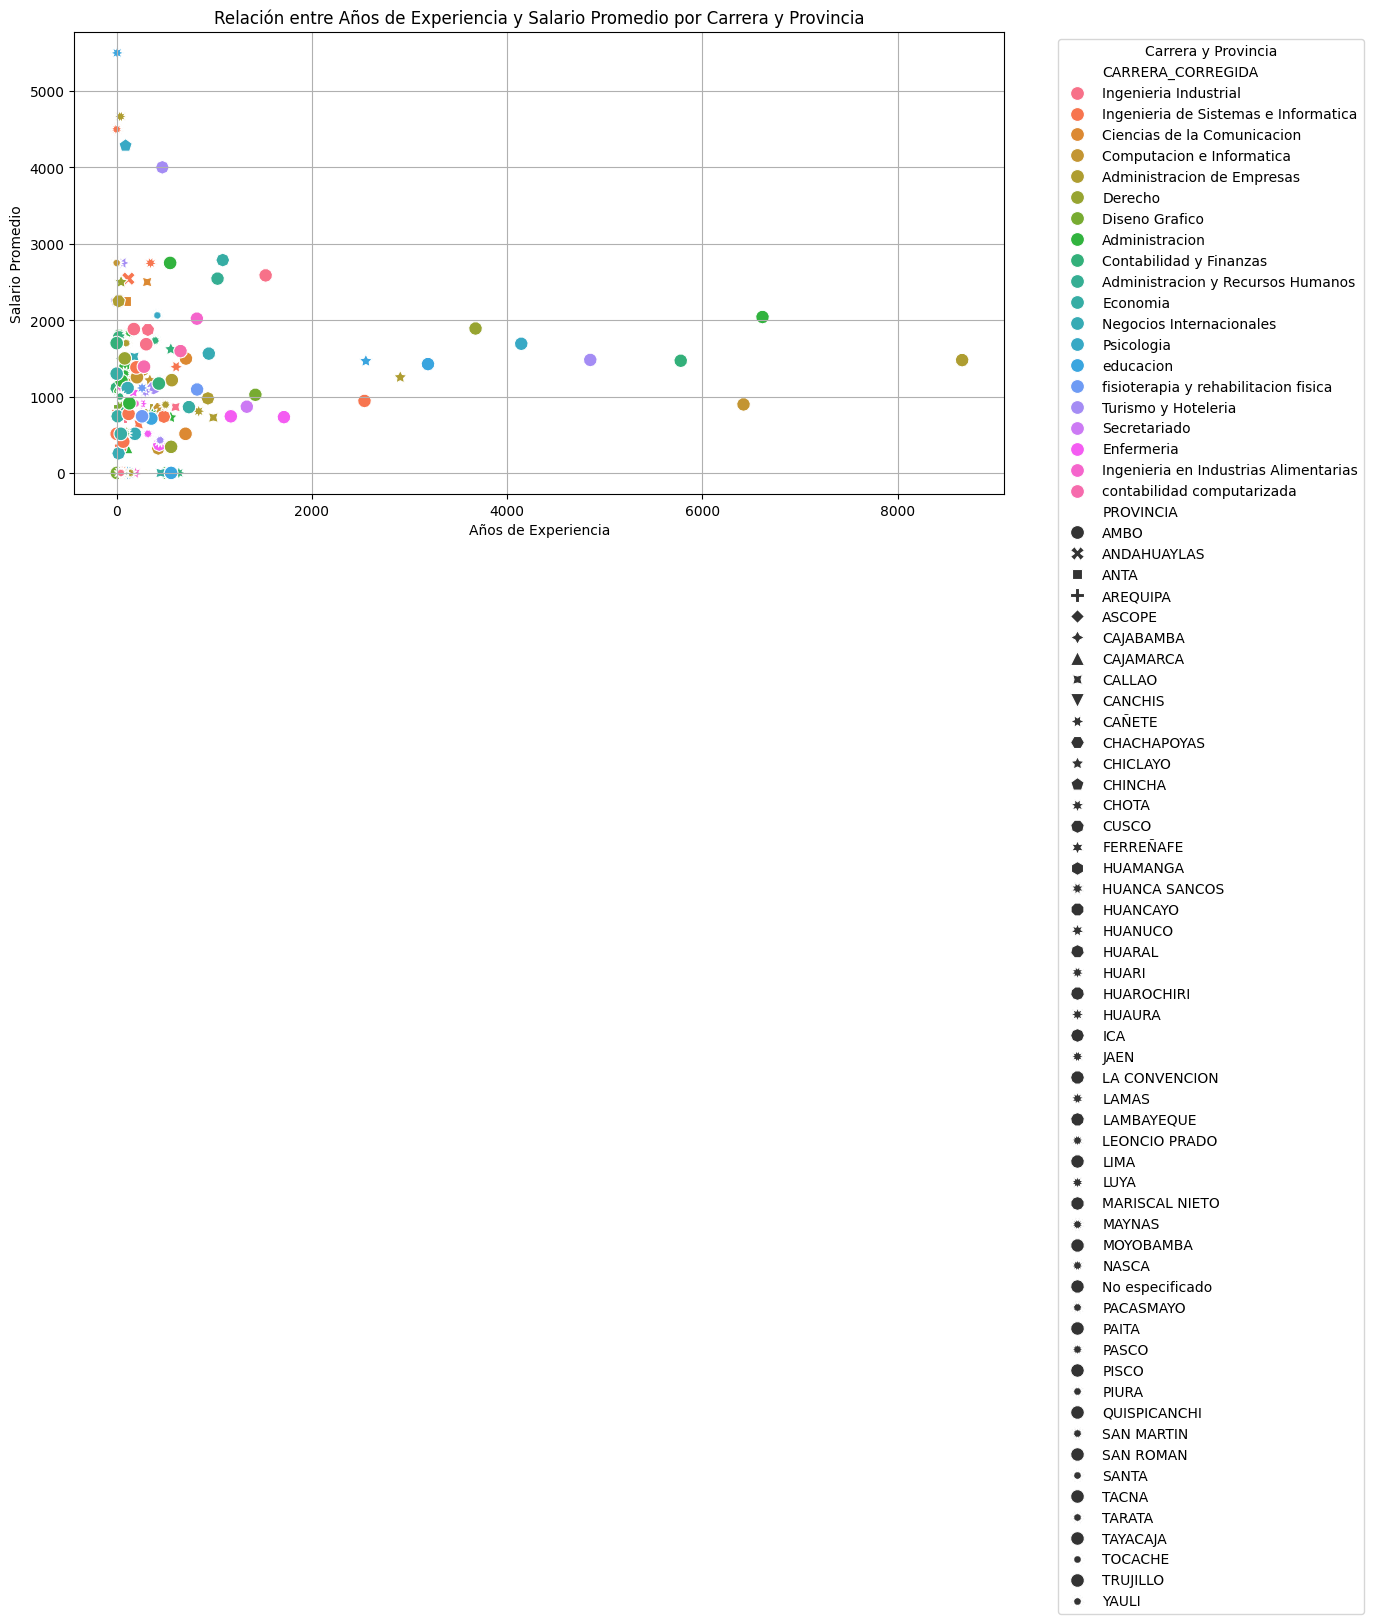

C:\Users\jacia\AppData\Local\Temp\ipykernel_33296\4070344740.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='EDAD', y='AÑOS_EXP', palette='Set2')


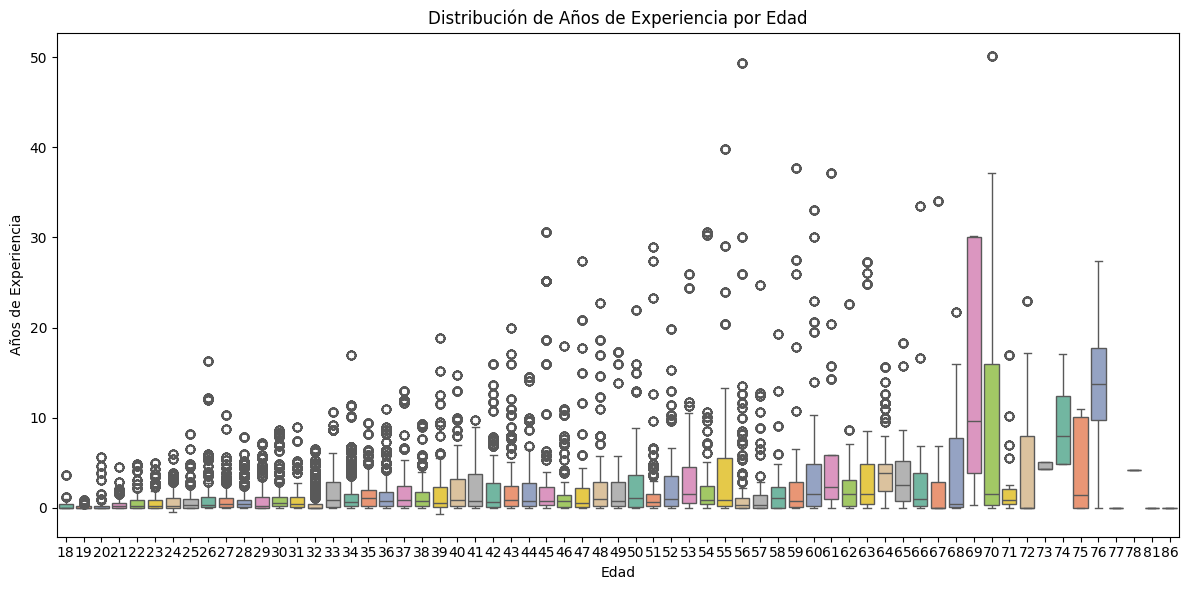

C:\Users\jacia\AppData\Local\Temp\ipykernel_33296\4070344740.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=salario_max_carrera, x='CARRERA_CORREGIDA', y='SALARIO_MAX', palette='Blues')


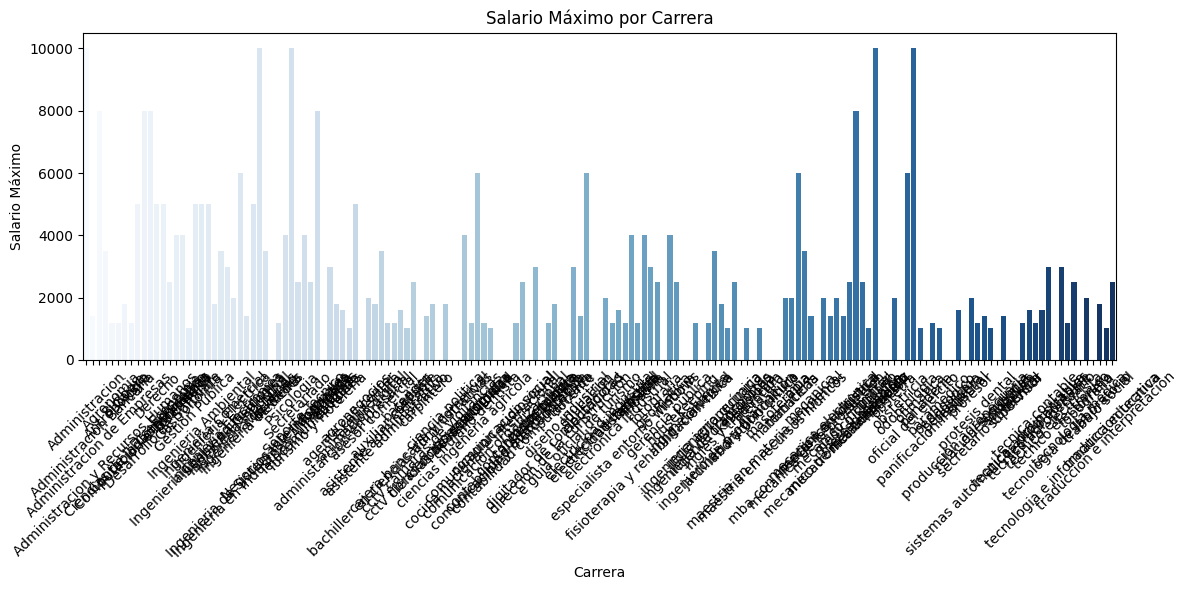

Insights adicionales:
- La relación entre los años de experiencia y el salario promedio muestra que a mayor experiencia, generalmente, se espera un mayor salario.
- La distribución de años de experiencia por edad indica que las personas más jóvenes pueden estar acumulando experiencia a un ritmo diferente que los mayores.
- El análisis de salario máximo por carrera revela las carreras con mayores potenciales salariales, lo que puede influir en la elección de carrera para futuros estudiantes.


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el archivo POSTULANTES_FINAL.csv
df = pd.read_csv('POSTULANTES_FINAL.csv')

# Preprocesar datos: extraer años de experiencia
df['FECHAINICIO_EXP'] = pd.to_datetime(df['FECHAINICIO_EXP'], errors='coerce')
df['FECHAFIN_EXP'] = pd.to_datetime(df['FECHAFIN_EXP'], errors='coerce')
df['AÑOS_EXP'] = (df['FECHAFIN_EXP'] - df['FECHAINICIO_EXP']).dt.days / 365.25
df['AÑOS_EXP'] = df['AÑOS_EXP'].fillna(0)

# Calcular salario promedio por carrera
df['SALARIO_PROM'] = df[['SALARIO_MIN', 'SALARIO_MAX']].mean(axis=1)

# Análisis de experiencia y salario por carrera y provincia
experiencia_salario = df.groupby(['PROVINCIA', 'CARRERA_CORREGIDA']).agg({
    'AÑOS_EXP': 'sum',
    'SALARIO_PROM': 'mean'
}).reset_index()

# Filtrar las 20 carreras más comunes
carreras_comunes = df['CARRERA_CORREGIDA'].value_counts().head(20).index
experiencia_salario = experiencia_salario[experiencia_salario['CARRERA_CORREGIDA'].isin(carreras_comunes)]

# Gráfico de experiencia vs salario promedio
plt.figure(figsize=(12, 6))
sns.scatterplot(data=experiencia_salario, x='AÑOS_EXP', y='SALARIO_PROM', hue='CARRERA_CORREGIDA', style='PROVINCIA', s=100)
plt.title('Relación entre Años de Experiencia y Salario Promedio por Carrera y Provincia')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario Promedio')
plt.legend(title='Carrera y Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Análisis de la distribución de la experiencia laboral en función de la edad
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='EDAD', y='AÑOS_EXP', palette='Set2')
plt.title('Distribución de Años de Experiencia por Edad')
plt.xlabel('Edad')
plt.ylabel('Años de Experiencia')
plt.tight_layout()
plt.show()

# Comparación del salario máximo por carrera
salario_max_carrera = df.groupby('CARRERA_CORREGIDA')['SALARIO_MAX'].max().reset_index()

# Gráfico de salario máximo por carrera
plt.figure(figsize=(12, 6))
sns.barplot(data=salario_max_carrera, x='CARRERA_CORREGIDA', y='SALARIO_MAX', palette='Blues')
plt.title('Salario Máximo por Carrera')
plt.xlabel('Carrera')
plt.ylabel('Salario Máximo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Insights adicionales
print("Insights adicionales:")
print("- La relación entre los años de experiencia y el salario promedio muestra que a mayor experiencia, generalmente, se espera un mayor salario.")
print("- La distribución de años de experiencia por edad indica que las personas más jóvenes pueden estar acumulando experiencia a un ritmo diferente que los mayores.")
print("- El análisis de salario máximo por carrera revela las carreras con mayores potenciales salariales, lo que puede influir en la elección de carrera para futuros estudiantes.")

